# **CHENNAI_HOUSE_PRICE_PREDICTION**


# Problem Statement


Problem Statement Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

# Exploring the content of variables

This dataframe contains 22 variables that correspond to:

PRT_ID -  Id is represented the house.

AREA - The area where house is located.

INT_SQFT - Total house in square feet.  

DATE_SALE - Date the which the house as been saled.

DIST_MAINROAD - How near the house as been located.  

N_BEDROOM -  Total number of bedrooms are built.

N_BATHROOM - Total number of bathrooms are built. 

N_ROOM - Total number of rooms are built

SALE_COND -  House types 

PARK_FACIL - Houses with the park

DATE_BUILD - Year of build the houses

BUILDTYPE -  Different types of building 

UTILITY_AVAIL - Public facilites  are located 

STREET - Many type of street

MZZONE -  Zone represent the location which is near to our house 

QS_ROOMS - QsRooms represented the Model and the atmosphere 

QS_BATHROOM - QsBath represented the Model and the atmosphere 

QS_BEDROOM - QsBeds represented the Model and the atmosphere

QS_OVERALL - QsOver all represent the house of the model .

REG_FEE -  Registration fee will be free

COMMIS - Commission for each house

SALES_PRICE - Sale price will differ for each house 
      


# Importing the Packages

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt 


%matplotlib inline
plt.rcParams['figure.figsize'] = (18,10)
plt.rcParams['font.size'] = 12
pd.set_option("display.max_rows", None, "display.max_columns", None)
plt.rcParams['figure.dpi'] = 70
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")

# Loading The Data 

In [4]:
df=pd.read_csv("/content/train-chennai-sale.csv")
df.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226  05-10-2009             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  DATE_BUILD   BUILDTYPE  \
0         1.0       3  AbNormal        Yes  15-05-1967  Commercial   
1         1.0       5  AbNormal         No  22-12-1995  Commercial   
2         1.0       3  AbNormal        Yes  09-02-1992  Commercial   
3         2.0       5    Family         No  18-03-1988      Others   
4         1.0       3  AbNormal        Yes  13-10-1979      Others   

  UTILITY_AVAIL  STREET MZZONE  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  \
0        AllPub   Paved      A       4.0          3.9         4.9       4.330   
1        AllPub  Gravel     RH       4.9          4.2         2.5       3.765   
2           ELO  Gravel     RL       4.1          3.8         2.2       3.090   
3       NoSewr    Paved      I       4.7          3.9         3.6       4.010   
4        AllPub  Gravel      C       3.0          2.5         4.1       3.290   

   REG_FEE  COMMIS  SALES_PRICE  
0   380000  144400      7600000  
1   760122  304049     21717770  
2   421094   92114     13159200  
3   356321   77042      9630290  
4   237000   74063      7406250

In [5]:
df.shape

(7109, 22)

In [6]:
df.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226  05-10-2009             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  DATE_BUILD   BUILDTYPE  \
0         1.0       3  AbNormal        Yes  15-05-1967  Commercial   
1         1.0       5  AbNormal         No  22-12-1995  Commercial   
2         1.0       3  AbNormal        Yes  09-02-1992  Commercial   
3         2.0       5    Family         No  18-03-1988      Others   
4         1.0       3  AbNormal        Yes  13-10-1979      Others   

  UTILITY_AVAIL  STREET MZZONE  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  \
0        AllPub   Paved      A       4.0          3.9         4.9       4.330   
1        AllPub  Gravel     RH       4.9          4.2         2.5       3.765   
2           ELO  Gravel     RL       4.1          3.8         2.2       3.090   
3       NoSewr    Paved      I       4.7          3.9         3.6       4.010   
4        AllPub  Gravel      C       3.0          2.5         4.1       3.290   

   REG_FEE  COMMIS  SALES_PRICE  
0   380000  144400      7600000  
1   760122  304049     21717770  
2   421094   92114     13159200  
3   356321   77042      9630290  
4   237000   74063      7406250

In [7]:
df.tail()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
7104  P03834  Karapakkam       598  03-01-2011             51        1.0   
7105  P10000   Velachery      1897  08-04-2004             52        3.0   
7106  P09594   Velachery      1614  25-08-2006            152        2.0   
7107  P06508  Karapakkam       787  03-08-2009             40        1.0   
7108  P09794   Velachery      1896  13-07-2005            156        3.0   

      N_BATHROOM  N_ROOM    SALE_COND PARK_FACIL  DATE_BUILD   BUILDTYPE  \
7104         1.0       2      AdjLand         No  15-01-1962      Others   
7105         2.0       5       Family        Yes  11-04-1995      Others   
7106         1.0       4  Normal Sale         No  01-09-1978       House   
7107         1.0       2      Partial        Yes  11-08-1977  Commercial   
7108         2.0       5      Partial        Yes  24-07-1961      Others   

     UTILITY_AVAIL     STREET MZZONE  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  \
7104           ELO  No Access     RM       3.0          2.2         2.4   
7105        NoSeWa  No Access     RH       3.6          4.5         3.3   
7106        NoSeWa     Gravel      I       4.3          4.2         2.9   
7107           ELO      Paved     RL       4.6          3.8         4.1   
7108           ELO      Paved      I       3.1          3.5         4.3   

      QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  
7104        2.52   208767  107060      5353000  
7105        3.92   346191  205551     10818480  
7106        3.84   317354  167028      8351410  
7107        4.16   425350  119098      8507000  
7108        3.64   349177   79812      9976480

In [8]:
df.describe()

INT_SQFT  DIST_MAINROAD    N_BEDROOM   N_BATHROOM       N_ROOM  \
count  7109.000000    7109.000000  7108.000000  7104.000000  7109.000000   
mean   1382.073006      99.603179     1.637029     1.213260     3.688704   
std     457.410902      57.403110     0.802902     0.409639     1.019099   
min     500.000000       0.000000     1.000000     1.000000     2.000000   
25%     993.000000      50.000000     1.000000     1.000000     3.000000   
50%    1373.000000      99.000000     1.000000     1.000000     4.000000   
75%    1744.000000     148.000000     2.000000     1.000000     4.000000   
max    2500.000000     200.000000     4.000000     2.000000     6.000000   

          QS_ROOMS  QS_BATHROOM   QS_BEDROOM   QS_OVERALL        REG_FEE  \
count  7109.000000  7109.000000  7109.000000  7061.000000    7109.000000   
mean      3.517471     3.507244     3.485300     3.503254  376938.330708   
std       0.891972     0.897834     0.887266     0.527223  143070.662010   
min       2.000000     2.000000     2.000000     2.000000   71177.000000   
25%       2.700000     2.700000     2.700000     3.130000  272406.000000   
50%       3.500000     3.500000     3.500000     3.500000  349486.000000   
75%       4.300000     4.300000     4.300000     3.890000  451562.000000   
max       5.000000     5.000000     5.000000     4.970000  983922.000000   

              COMMIS   SALES_PRICE  
count    7109.000000  7.109000e+03  
mean   141005.726544  1.089491e+07  
std     78768.093718  3.768603e+06  
min      5055.000000  2.156875e+06  
25%     84219.000000  8.272100e+06  
50%    127628.000000  1.033505e+07  
75%    184506.000000  1.299390e+07  
max    495405.000000  2.366734e+07

In [9]:
df.duplicated().head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

# Cleaning The Data

In [10]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [11]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [12]:
df.isnull().sum()/df.shape[0]*100

PRT_ID           0.000000
AREA             0.000000
INT_SQFT         0.000000
DATE_SALE        0.000000
DIST_MAINROAD    0.000000
N_BEDROOM        0.014067
N_BATHROOM       0.070333
N_ROOM           0.000000
SALE_COND        0.000000
PARK_FACIL       0.000000
DATE_BUILD       0.000000
BUILDTYPE        0.000000
UTILITY_AVAIL    0.000000
STREET           0.000000
MZZONE           0.000000
QS_ROOMS         0.000000
QS_BATHROOM      0.000000
QS_BEDROOM       0.000000
QS_OVERALL       0.675200
REG_FEE          0.000000
COMMIS           0.000000
SALES_PRICE      0.000000
dtype: float64

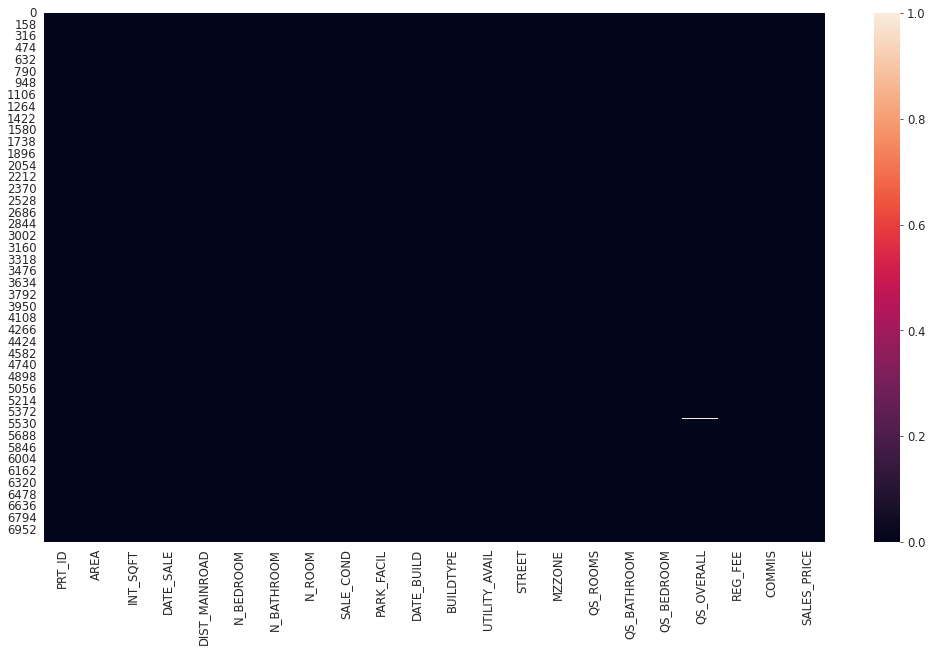

In [13]:
sns.heatmap(df.isnull())
plt.show()

# Filling the null values

In [14]:
df.N_BEDROOM.isnull().sum()

1

In [15]:
print("Mean of the data :",df.N_BEDROOM.mean())
print("Mode of the data :",df.N_BEDROOM.mode())

Mean of the data : 1.6370287000562747
Mode of the data : 0    1.0
dtype: float64


In [16]:
df.N_BEDROOM.fillna(1,inplace=True)

In [17]:
df["N_BEDROOM"].isnull().sum()

0

In [18]:
df.N_BATHROOM.isnull().sum()

5

In [19]:
print("Mean of the data :",df.N_BATHROOM.mean())
print("Mode of the data :",df.N_BATHROOM.mode())

Mean of the data : 1.213260135135135
Mode of the data : 0    1.0
dtype: float64


In [20]:
df.N_BATHROOM.fillna(1,inplace=True)

In [21]:
df["N_BATHROOM"].isnull().sum()

0

In [22]:
df["QS_OVERALL"].isnull().sum()

48

In [23]:
print("Mean of the data:",df.QS_OVERALL.mean())
print("Mean of the data:",df.QS_OVERALL.mode())

Mean of the data: 3.5032537884152384
Mean of the data: 0    3.54
dtype: float64


In [24]:
df.QS_OVERALL.fillna(3,inplace=True)

In [25]:
df["QS_OVERALL"].isnull().sum()

0

# Final Cheacking with the null Values

In [26]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

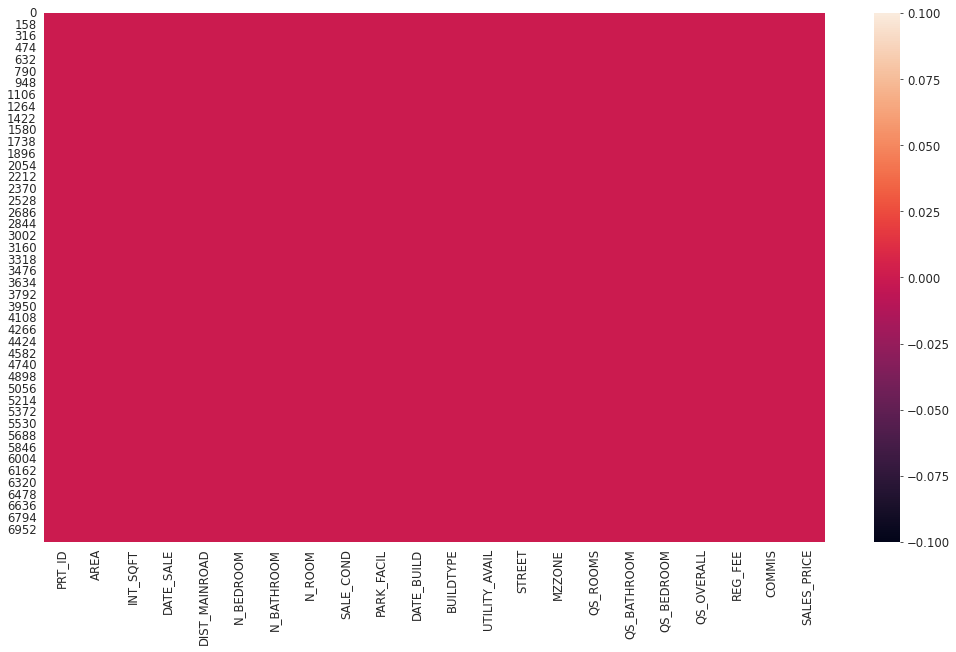

In [27]:
sns.heatmap(df.isnull())
plt.show()

# Checking the spelling **mistake**

In [28]:
#df=df.select_dtypes("object")
#df.head()

In [29]:
#df=df.select_dtypes(exclude=["object"])
#df.head()

In [30]:
df["AREA"].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [31]:
df['AREA']=df['AREA'].str.lower()
df['AREA'].unique()

array(['karapakkam', 'anna nagar', 'adyar', 'velachery', 'chrompet',
       'kk nagar', 'tnagar', 't nagar', 'chrompt', 'chrmpet', 'karapakam',
       'ana nagar', 'chormpet', 'adyr', 'velchery', 'ann nagar',
       'kknagar'], dtype=object)

In [32]:
df["AREA"].str.strip()
df["AREA"].unique()

array(['karapakkam', 'anna nagar', 'adyar', 'velachery', 'chrompet',
       'kk nagar', 'tnagar', 't nagar', 'chrompt', 'chrmpet', 'karapakam',
       'ana nagar', 'chormpet', 'adyr', 'velchery', 'ann nagar',
       'kknagar'], dtype=object)

In [33]:
df.groupby("AREA")["AREA"].agg("count")

AREA
adyar          773
adyr             1
ana nagar        3
ann nagar        2
anna nagar     783
chormpet         6
chrmpet          6
chrompet      1681
chrompt          9
karapakam        3
karapakkam    1363
kk nagar       996
kknagar          1
t nagar        496
tnagar           5
velachery      979
velchery         2
Name: AREA, dtype: int64

In [34]:
mapping={'karapakkam':'Karapakkam',
         'karapakam':'Karapakkam',
         'anna nagar':'Anna Nagar',
         'adyar':'Adyar',
         'adyr':'Adyar',
         'velachery':'Velachery',
         'velachery':'Velachery',
         'ana nagar':'Anna Nagar',
         'ann nagar':'Anna Nagar',
         'chrompet':'Chrompet',
         'chrmpet':'Chrompet',
         'chrompt':'Chrompet',
         'chormpet':'Chrompet',
         'velchery':'Velachery',
         'kk nagar':'KK Nagar',
         'kknagar':'KK Nagar',
         'tnagar':'T Nagar',
         't nagar':'T Nagar'
}

In [35]:
df["AREA"]=df["AREA"].replace(mapping)

In [36]:
df["AREA"].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [37]:
df.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [38]:
df.SALE_COND.value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [39]:
df['SALE_COND']=df['SALE_COND'].str.lower()
df['SALE_COND'].unique()

array(['abnormal', 'family', 'partial', 'adjland', 'normal sale',
       'ab normal', 'partiall', 'adj land'], dtype=object)

In [40]:
mapping={'abnormal':'AbNormal',
         'ab normal':'AbNormal',
         'adj land':'AdjLand',
         'adjland':'AdjLand',
         'family':'Family',
         'normal sale':'Normal Sale',
         'partiaLl':'Partial',
         'partial':'Partial',
         'partiall':'Partial'}

In [41]:
df['SALE_COND']=df['SALE_COND'].replace(mapping)

In [42]:
df.SALE_COND.value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [43]:
df.BUILDTYPE.value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [44]:
df['BUILDTYPE']=df['BUILDTYPE'].str.lower()
df['BUILDTYPE'].unique()

array(['commercial', 'others', 'other', 'house', 'comercial'],
      dtype=object)

In [45]:
mapping={'commercial':'Commercial',
          'comercial':'Commercial',
         'house':'House',
         'other':'Others',
         'others':'Others'}

In [46]:
df['BUILDTYPE']=df['BUILDTYPE'].replace(mapping)
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [47]:
df.BUILDTYPE.value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [48]:
df.UTILITY_AVAIL.value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [49]:
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].str.lower()
df['UTILITY_AVAIL'].unique()

array(['allpub', 'elo', 'nosewr ', 'nosewa', 'all pub'], dtype=object)

In [50]:
mapping={"allpub":"All Pub",
         "all pub":"All Pub",
         "nosewa":"Nosewa",
         "nosewr":"Nosewr",
         "elo":"Elo"}

In [51]:
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].replace(mapping)

In [52]:
df["UTILITY_AVAIL"].value_counts()

All Pub    1887
Nosewa     1871
nosewr     1829
Elo        1522
Name: UTILITY_AVAIL, dtype: int64

In [53]:
df.STREET.value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [54]:
df['STREET'].replace({"No Access":"NoAccess","Paved":"Pavd"},inplace=True)
df['STREET'].unique()

array(['Pavd', 'Gravel', 'NoAccess'], dtype=object)

In [55]:
df.STREET.value_counts()

Pavd        2572
Gravel      2520
NoAccess    2017
Name: STREET, dtype: int64

In [56]:
df.PARK_FACIL.value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [57]:
df['PARK_FACIL'].replace({"Yes":"Yes","No":"No","Noo":"No"},inplace=True)
df['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

In [58]:
df.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [59]:
df['DATE_SALE'].head()

0    04-05-2011
1    19-12-2006
2    04-02-2012
3    13-03-2010
4    05-10-2009
Name: DATE_SALE, dtype: object

In [60]:
df['DATE_SALE']=pd.to_datetime(df.DATE_SALE)
df['DATE_SALE'].head()

0   2011-04-05
1   2006-12-19
2   2012-04-02
3   2010-03-13
4   2009-05-10
Name: DATE_SALE, dtype: datetime64[ns]

In [61]:
df['DATE_BUILD']=pd.to_datetime(df.DATE_BUILD)

In [62]:
df['BUILD_YEAR'] = df['DATE_BUILD'].dt.year
df['SALE_YEAR'] =df['DATE_SALE'].dt.year
df['SALE_YEAR'].head()

0    2011
1    2006
2    2012
3    2010
4    2009
Name: SALE_YEAR, dtype: int64

In [63]:
df.head()

PRT_ID        AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004 2011-04-05            131        1.0   
1  P09411  Anna Nagar      1986 2006-12-19             26        2.0   
2  P01812       Adyar       909 2012-04-02             70        1.0   
3  P05346   Velachery      1855 2010-03-13             14        3.0   
4  P06210  Karapakkam      1226 2009-05-10             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL DATE_BUILD   BUILDTYPE  \
0         1.0       3  AbNormal        Yes 1967-05-15  Commercial   
1         1.0       5  AbNormal         No 1995-12-22  Commercial   
2         1.0       3  AbNormal        Yes 1992-09-02  Commercial   
3         2.0       5    Family         No 1988-03-18      Others   
4         1.0       3  AbNormal        Yes 1979-10-13      Others   

  UTILITY_AVAIL  STREET MZZONE  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  \
0       All Pub    Pavd      A       4.0          3.9         4.9       4.330   
1       All Pub  Gravel     RH       4.9          4.2         2.5       3.765   
2           Elo  Gravel     RL       4.1          3.8         2.2       3.090   
3       nosewr     Pavd      I       4.7          3.9         3.6       4.010   
4       All Pub  Gravel      C       3.0          2.5         4.1       3.290   

   REG_FEE  COMMIS  SALES_PRICE  BUILD_YEAR  SALE_YEAR  
0   380000  144400      7600000        1967       2011  
1   760122  304049     21717770        1995       2006  
2   421094   92114     13159200        1992       2012  
3   356321   77042      9630290        1988       2010  
4   237000   74063      7406250        1979       2009

# Droping the unwanted columns

In [64]:
df=df.drop(['DATE_SALE',"DATE_BUILD","PRT_ID","REG_FEE","COMMIS"],axis = 1)

# Visualizing Data

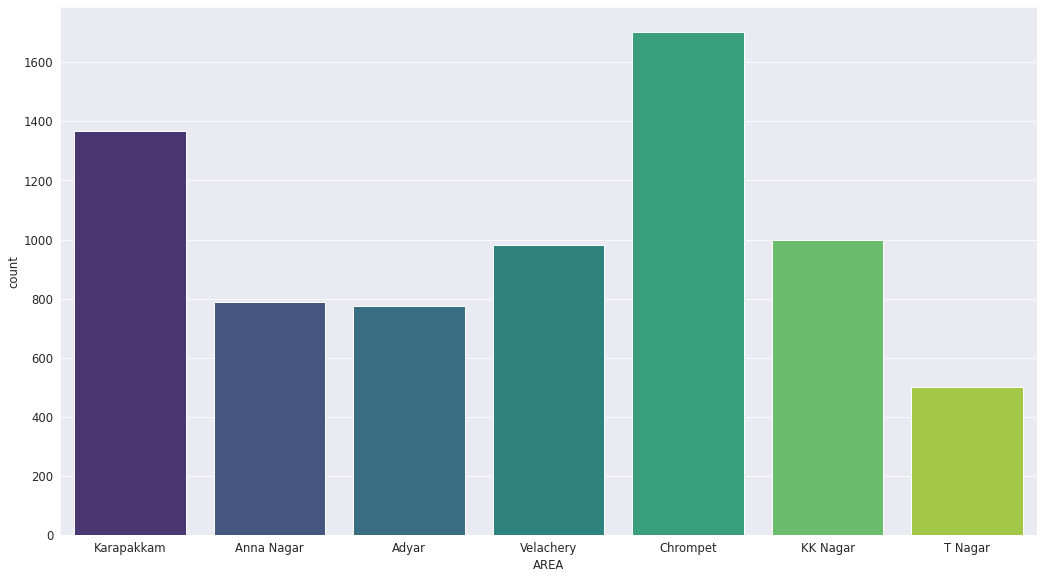

In [65]:
sns.countplot(data=df,x="AREA",palette='viridis')
plt.show()

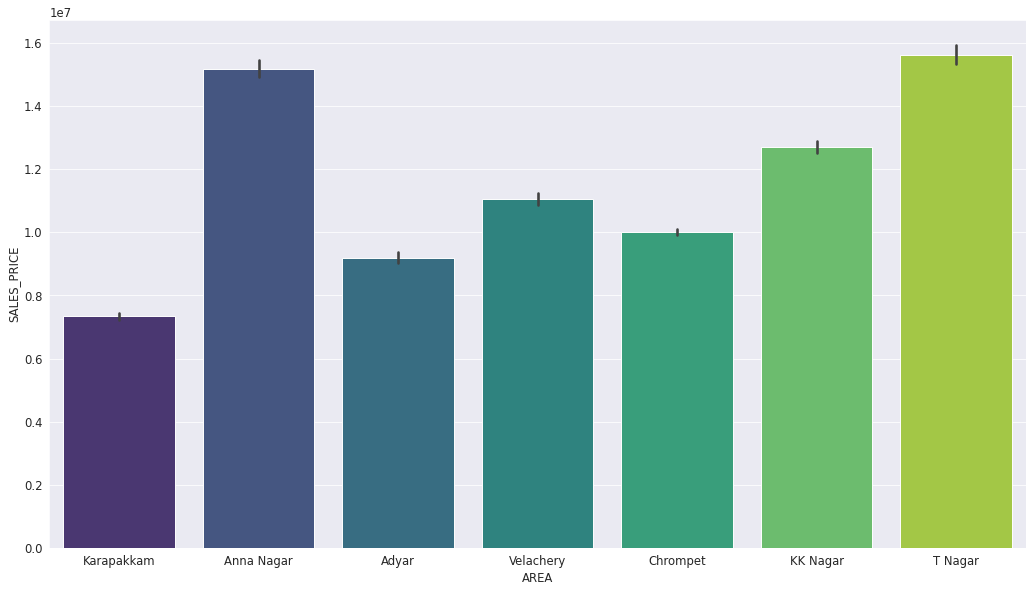

In [66]:
sns.barplot(data=df,x='AREA',y='SALES_PRICE',palette='viridis')

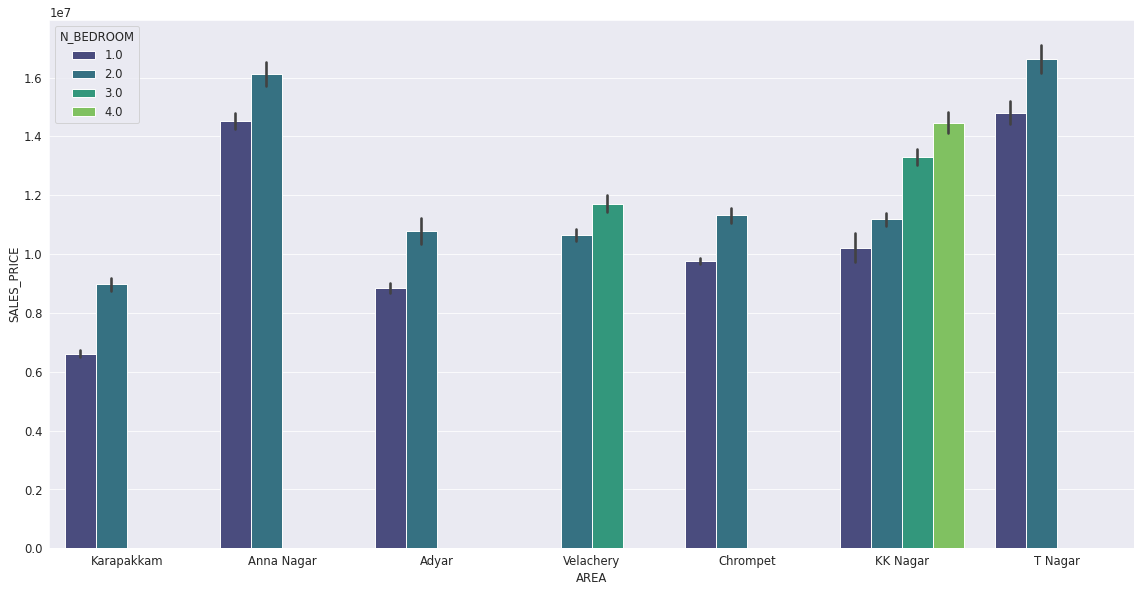

In [67]:
plt.figure(figsize=(20,10))
sns.barplot(data=df,x='AREA',y='SALES_PRICE',hue='N_BEDROOM',palette='viridis')

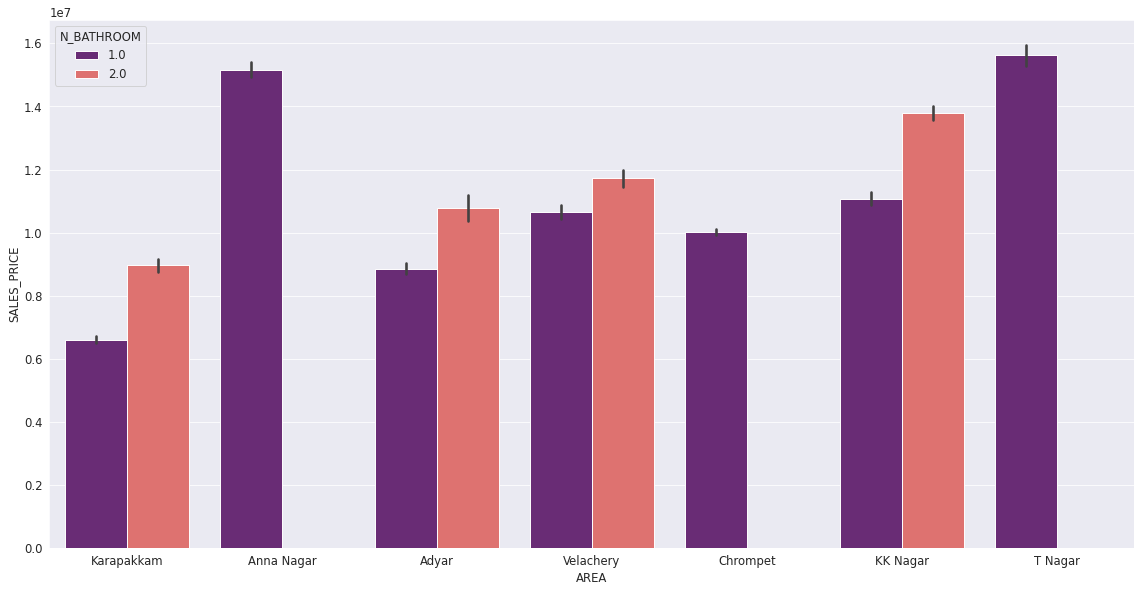

In [68]:
plt.figure(figsize=(20,10))
sns.barplot(data=df,x='AREA',y='SALES_PRICE',hue='N_BATHROOM',palette='magma')

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=df,x='AREA',y='SALES_PRICE',hue='DIST_MAINROAD',palette='magma')

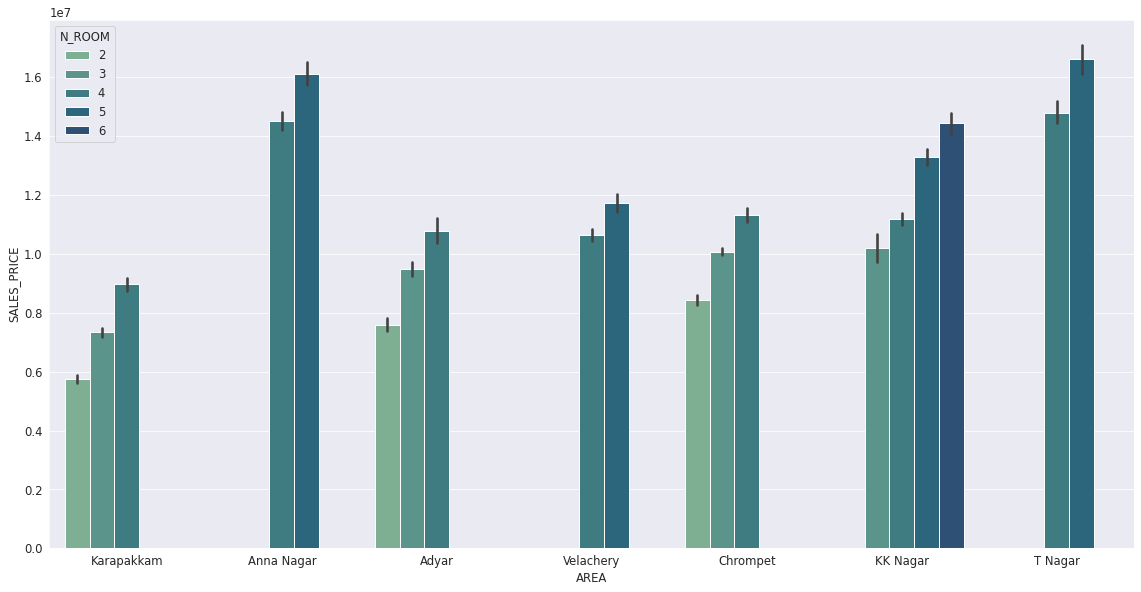

In [70]:
plt.figure(figsize=(20,10))
sns.barplot(data=df,x='AREA',y='SALES_PRICE',hue='N_ROOM',palette='crest')

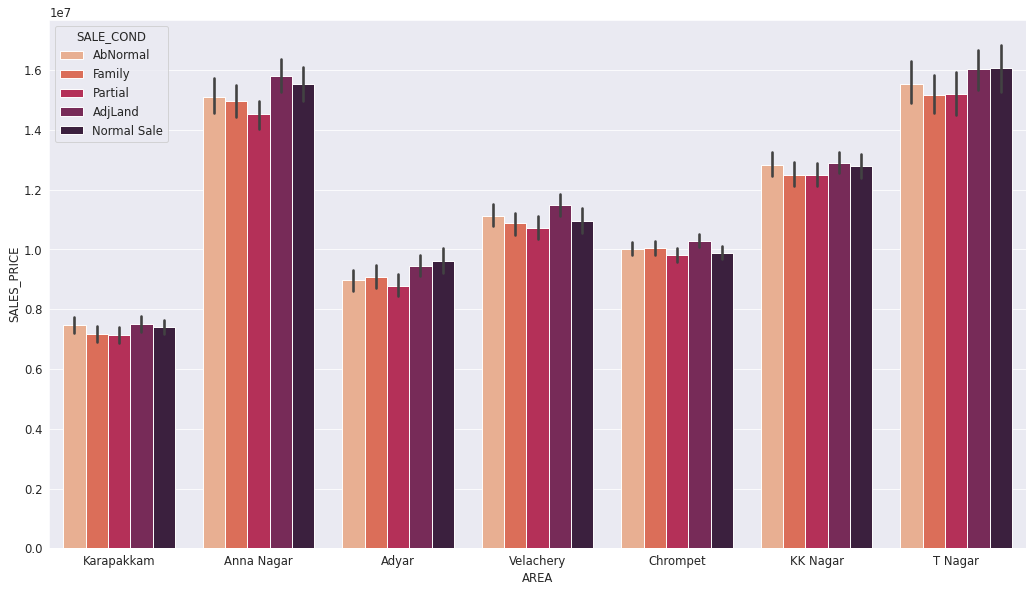

In [71]:
sns.barplot(data=df,x='AREA',y='SALES_PRICE',hue='SALE_COND',palette='rocket_r')

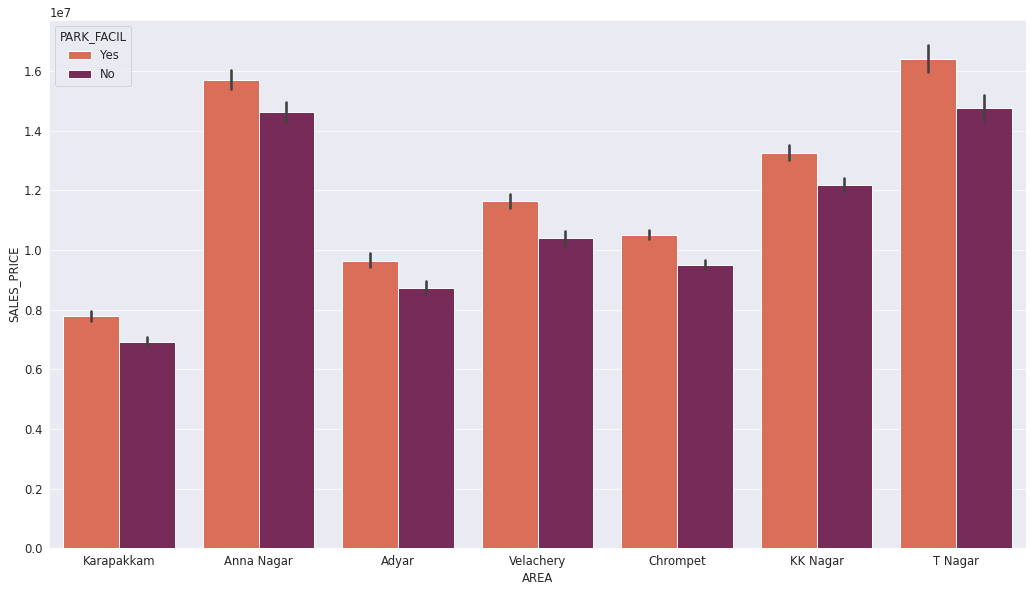

In [72]:
sns.barplot(data=df,x='AREA',y='SALES_PRICE',hue='PARK_FACIL',palette='rocket_r')

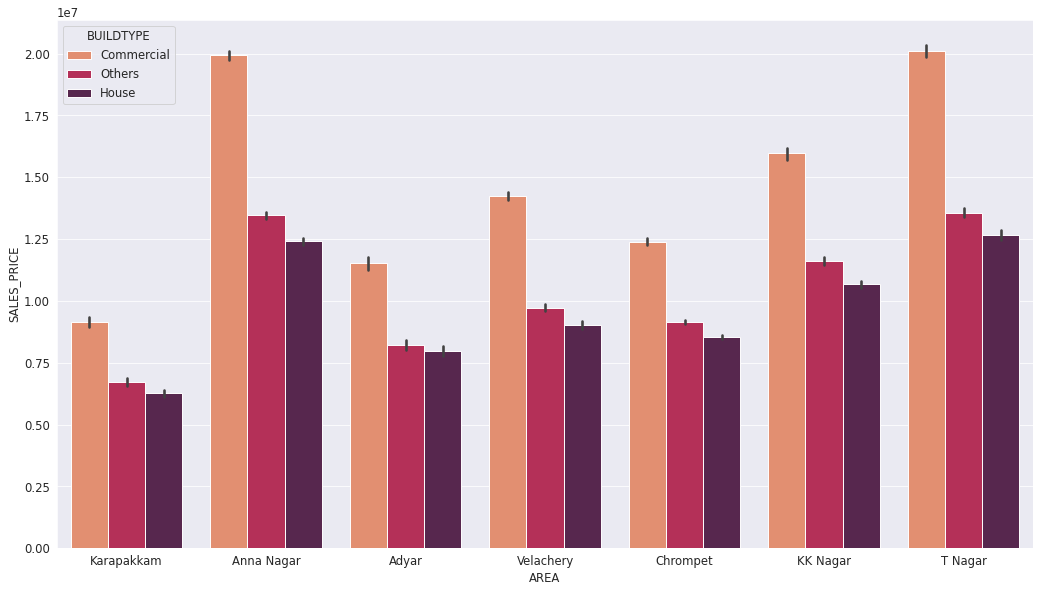

In [73]:
sns.barplot(data=df,x='AREA',y='SALES_PRICE',hue='BUILDTYPE',palette='rocket_r')

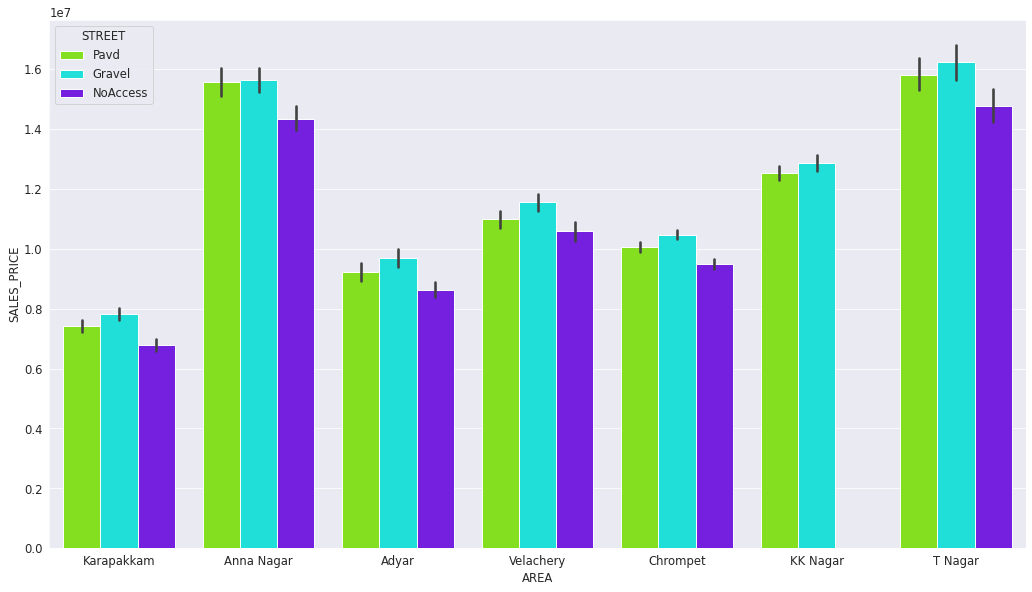

In [74]:
sns.barplot(data=df,x = 'AREA',y="SALES_PRICE",hue='STREET',palette='hsv')

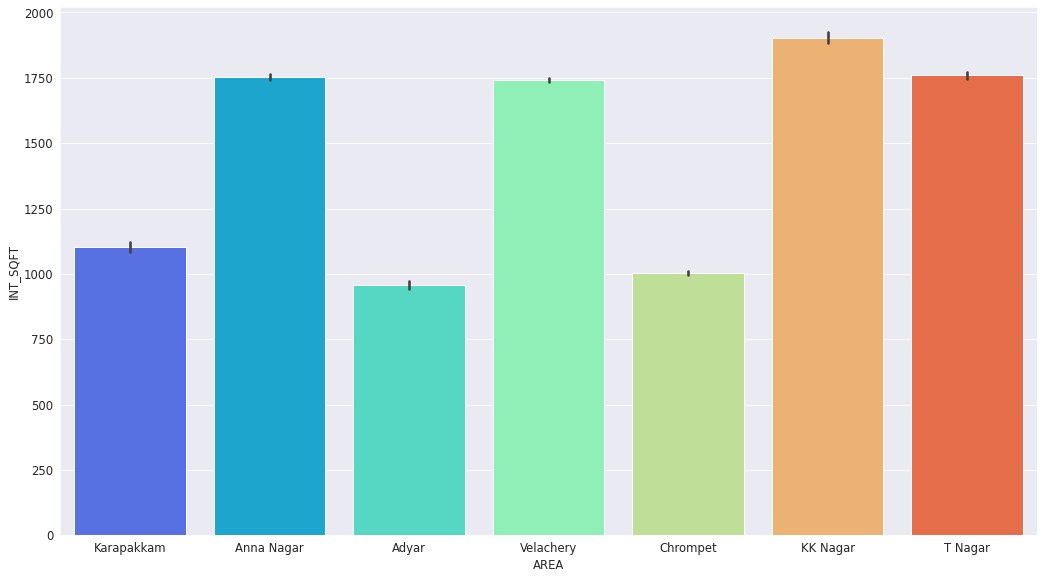

In [75]:
sns.barplot(data=df,x = 'AREA',y='INT_SQFT',palette='rainbow')

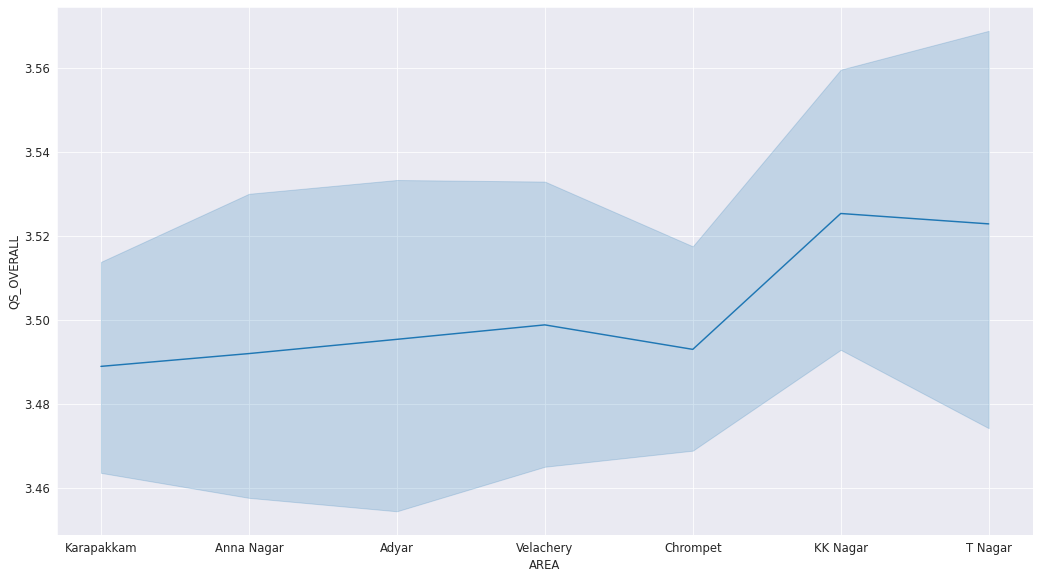

In [76]:
sns.lineplot(x="AREA", y="QS_OVERALL",data=df)

From Above analysis we Understood few points;

1.T-Nager - The more Number of sale in a Area when compared to the other Areas:

2.Chrompet as the more number of houses when compared to the Area:

3.Anna Nager,Tnager commercial building are high when compared to other areas.

4.Kknager square feet is higher when compared to Tnager,Chrompet.

5.More sale in KKnger and Tnager.

6.Tnager sale price is high ,especially in Gravel.when compared to other street

7.Tnager showing the more number park facilits.

8.Tnager sales condition is always higher.All types of persons buying and selling the houses .

9.More convenients in rooms,house types,park facilities,sales and  Majority things regularly happening in T-Nager .


# Finding **Features VS Target**

# Area v/s Sales Price

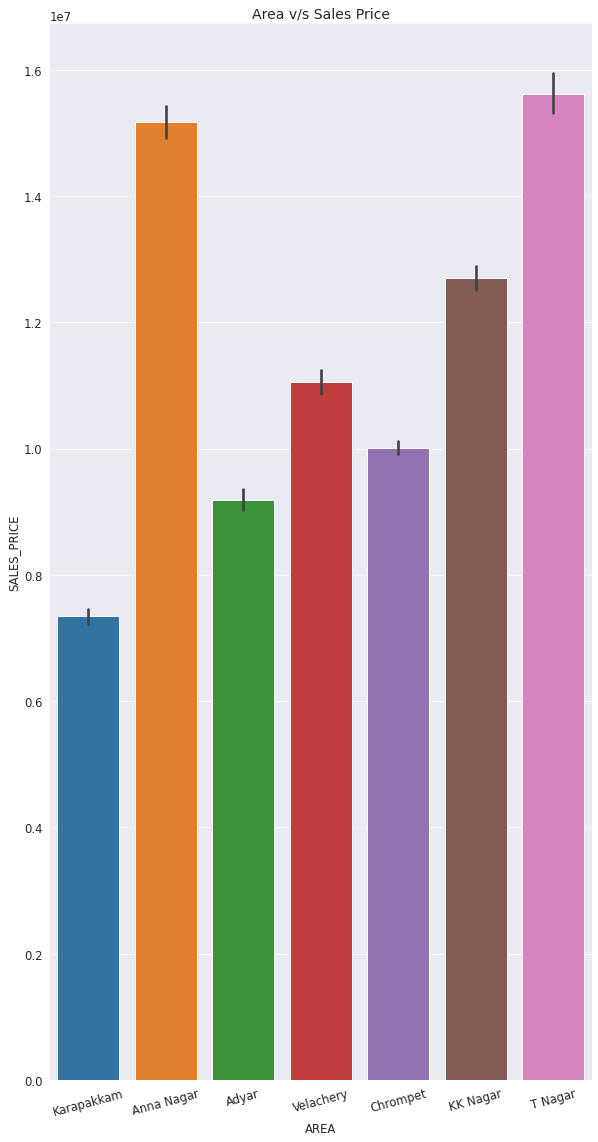

In [77]:
plt.figure(figsize=(10,20))
sns.barplot(x='AREA',y='SALES_PRICE',data=df)
plt.xticks(rotation=15)
plt.title('Area v/s Sales Price')
plt.show()

# Int Soft v/s Sale Price

Text(0.5, 1.0, 'Int Soft v/s Sale Price')

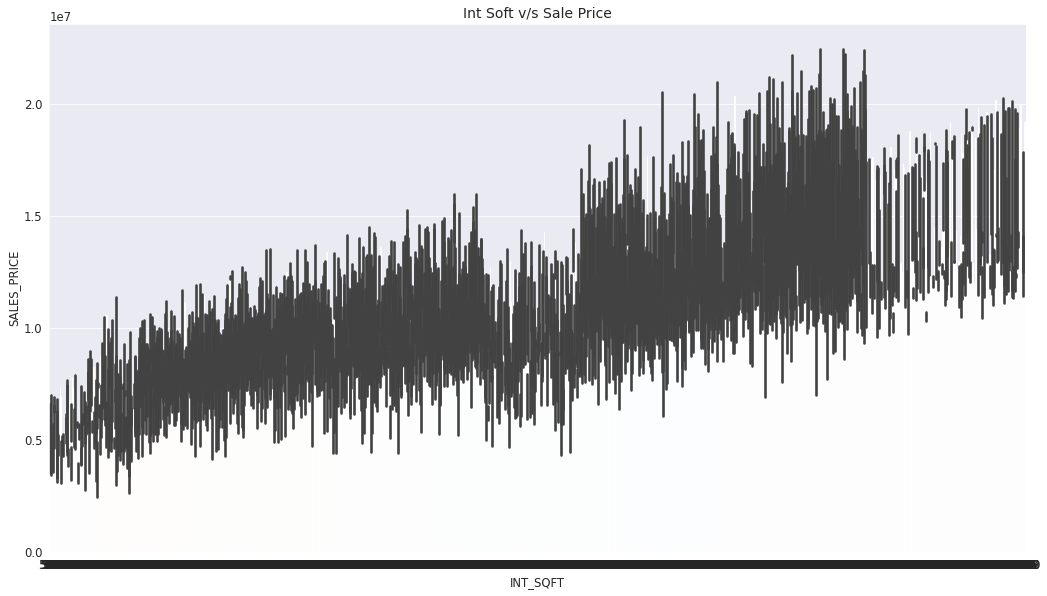

In [78]:
sns.barplot(x="INT_SQFT",y="SALES_PRICE",data=df)
plt.title('Int Soft v/s Sale Price')

# Dist_Mainroad v/s Sale Price

Text(0.5, 1.0, 'Dist_Mainroad v/s Sale Price')

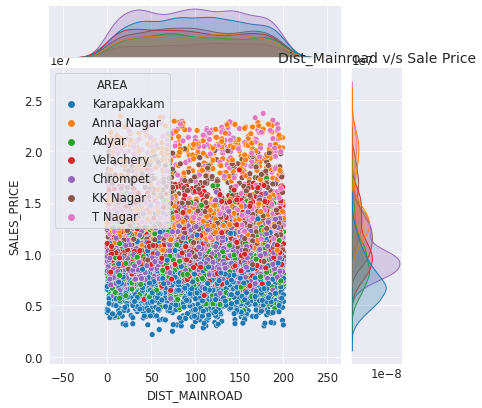

In [79]:
sns.jointplot(x="DIST_MAINROAD",y="SALES_PRICE",hue='AREA',data=df)
plt.title('Dist_Mainroad v/s Sale Price')

# N_Bedrooom v/s Sale Price

Text(0.5, 1.0, 'N_Bedrooom v/s Sale Price')

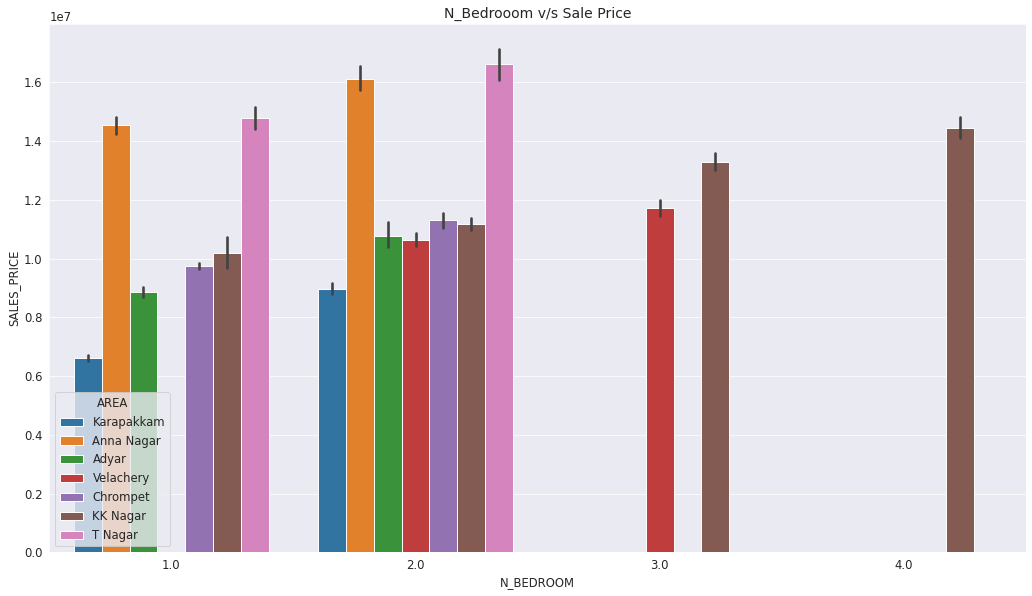

In [80]:
sns.barplot(x='N_BEDROOM',y='SALES_PRICE',hue='AREA',data=df)
plt.title('N_Bedrooom v/s Sale Price')

# N_Bathroom v/s Sale Price

Text(0.5, 1.0, 'N_Bathroom v/s Sale Price')

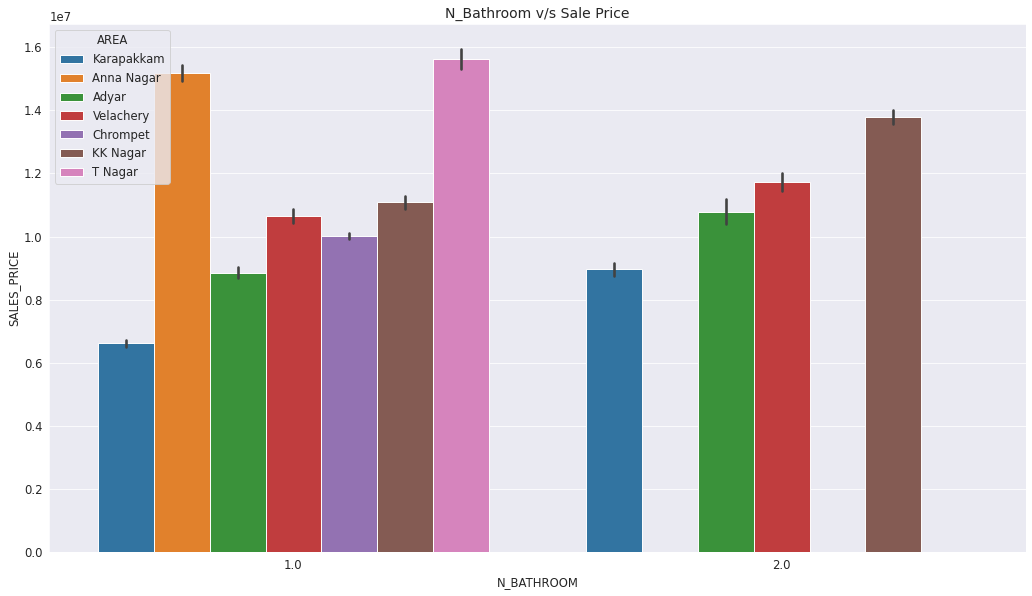

In [81]:
sns.barplot(x='N_BATHROOM',y='SALES_PRICE',hue='AREA',data=df)
plt.title('N_Bathroom v/s Sale Price')

# N_Room v/s Sale Price

Text(0.5, 1.0, 'N_Room v/s Sale Price')

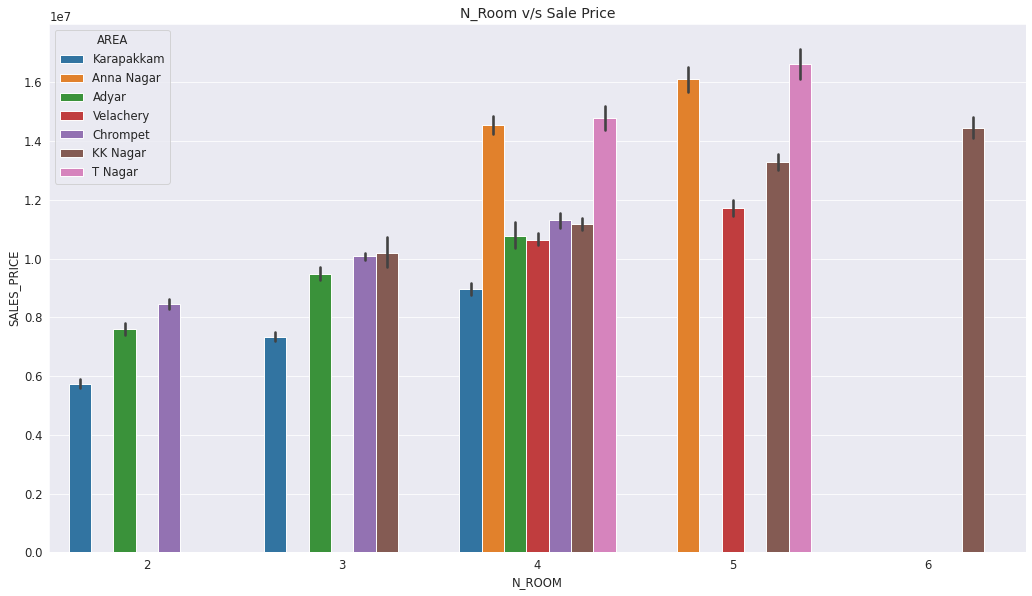

In [82]:
sns.barplot(x='N_ROOM',y='SALES_PRICE',hue='AREA',data=df)
plt.title('N_Room v/s Sale Price')

# Sale_Cond v/s Sale Price

Text(0.5, 1.0, 'Sale_Cond v/s Sale Price')

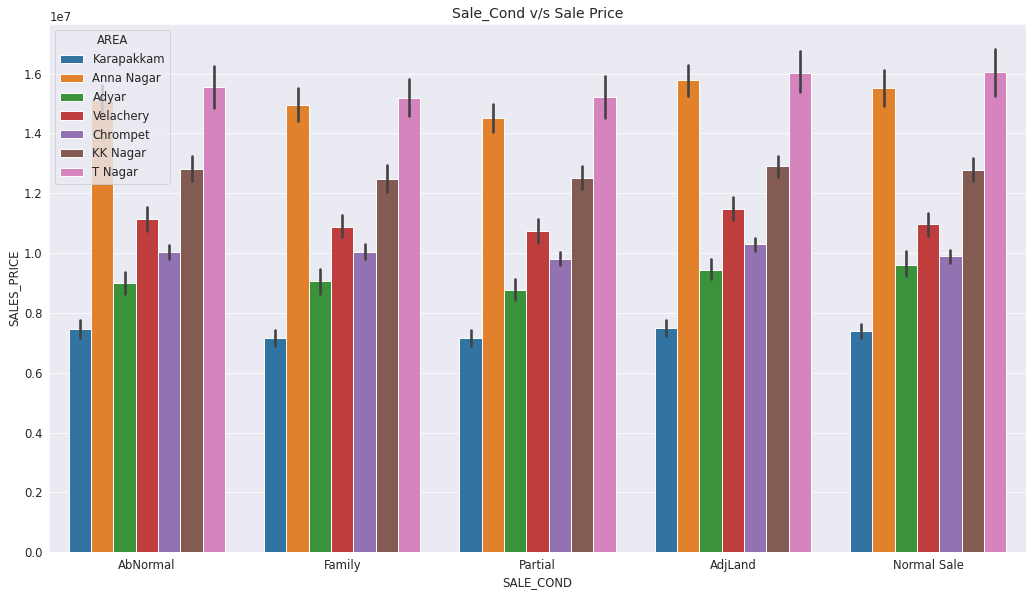

In [83]:
sns.barplot(x='SALE_COND',y='SALES_PRICE',hue='AREA',data=df)
plt.title('Sale_Cond v/s Sale Price')

# Park_Facil v/s Sale Price

Text(0.5, 1.0, 'Park_Facil v/s Sale Price')

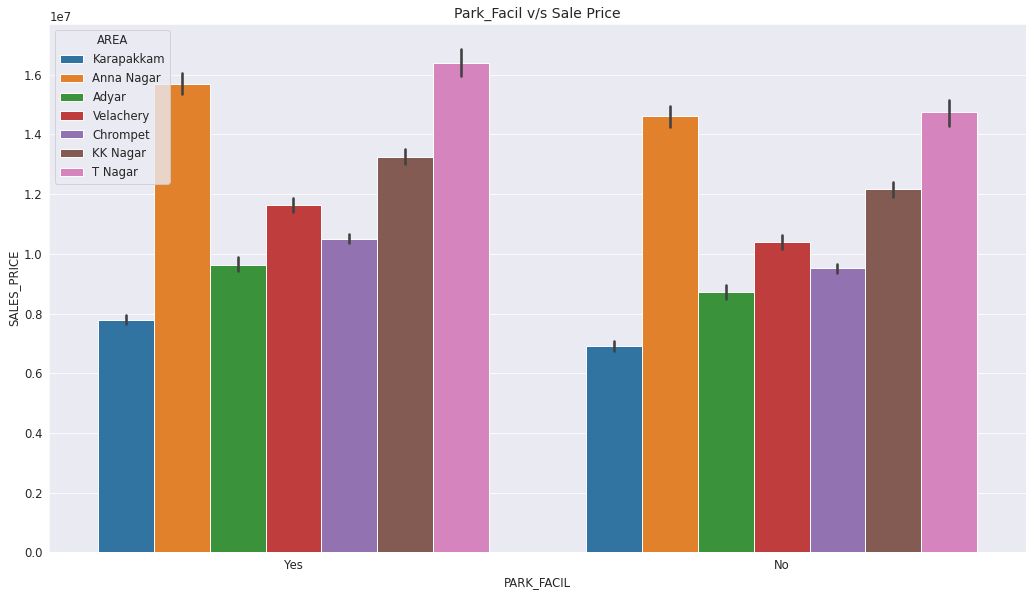

In [84]:
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',hue='AREA',data=df)
plt.title('Park_Facil v/s Sale Price')

# Buildtype v/s sales price

Text(0.5, 1.0, 'Buildtype v/s sales price')

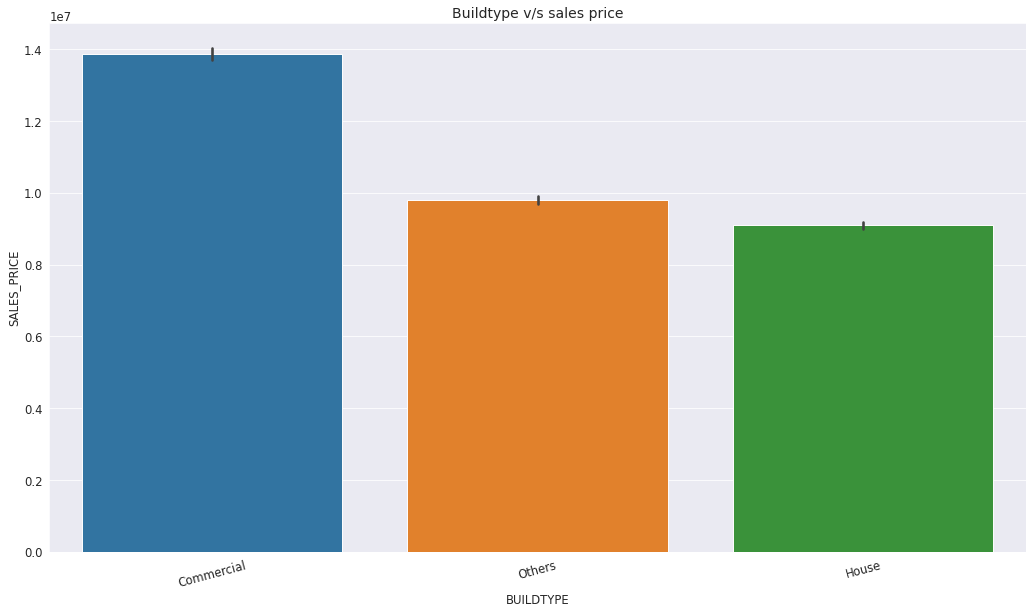

In [85]:
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df)
plt.xticks(rotation=15)
plt.title('Buildtype v/s sales price')

# utility available v/s sales price

Text(0.5, 1.0, 'utility available v/s sales price')

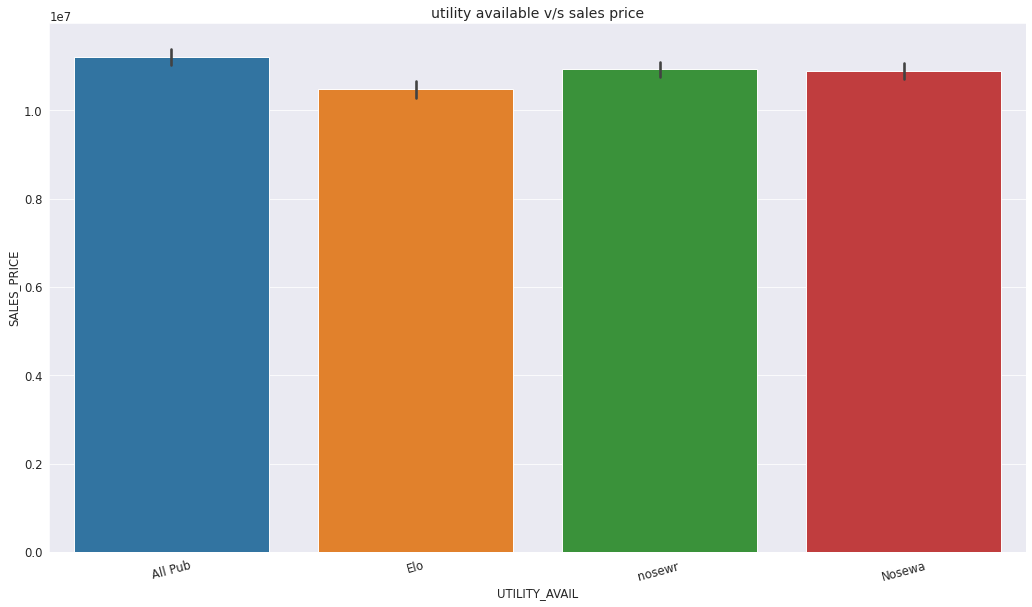

In [86]:
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df)
plt.xticks(rotation=15)
plt.title('utility available v/s sales price')

# treet v/s Sale Price

Text(0.5, 1.0, 'Street v/s Sale Price')

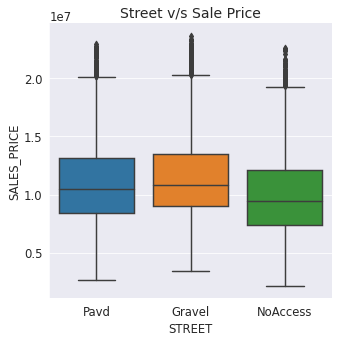

In [87]:
sns.catplot(x='STREET',y='SALES_PRICE',data=df,kind="box")
plt.title('Street v/s Sale Price')

# Mzzone v/s Sale Price

Text(0.5, 1.0, 'Mzzone v/s Sale Price')

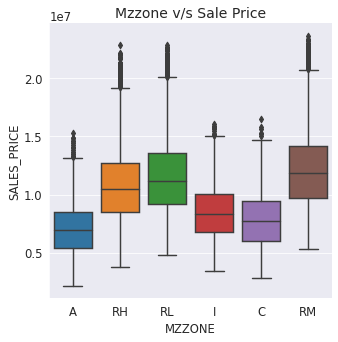

In [88]:
sns.catplot(x='MZZONE',y='SALES_PRICE',data=df,kind="box")
plt.title('Mzzone v/s Sale Price')

# Qs_Room v/s Sale Price

Text(0.5, 1.0, 'Qs_Room v/s Sale Price')

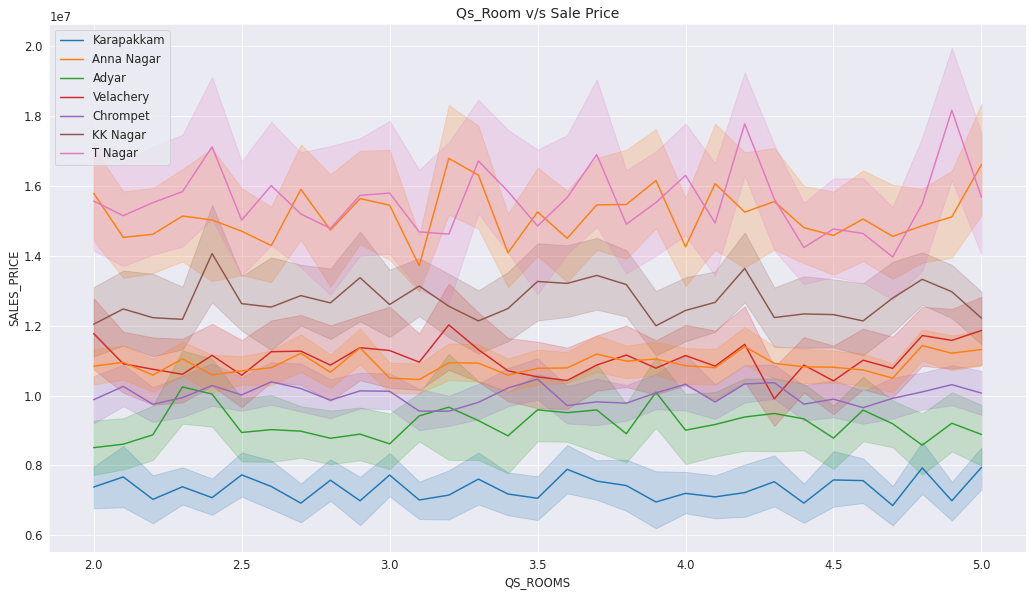

In [89]:
sns.lineplot(x='QS_ROOMS',y='SALES_PRICE',hue="AREA",data=df)
sns.lineplot(x='QS_ROOMS',y='SALES_PRICE',data=df)
plt.title('Qs_Room v/s Sale Price')

# Qs_BedRoom v/s Sale Price

Text(0.5, 1.0, 'Qs_BedRoom v/s Sale Price')

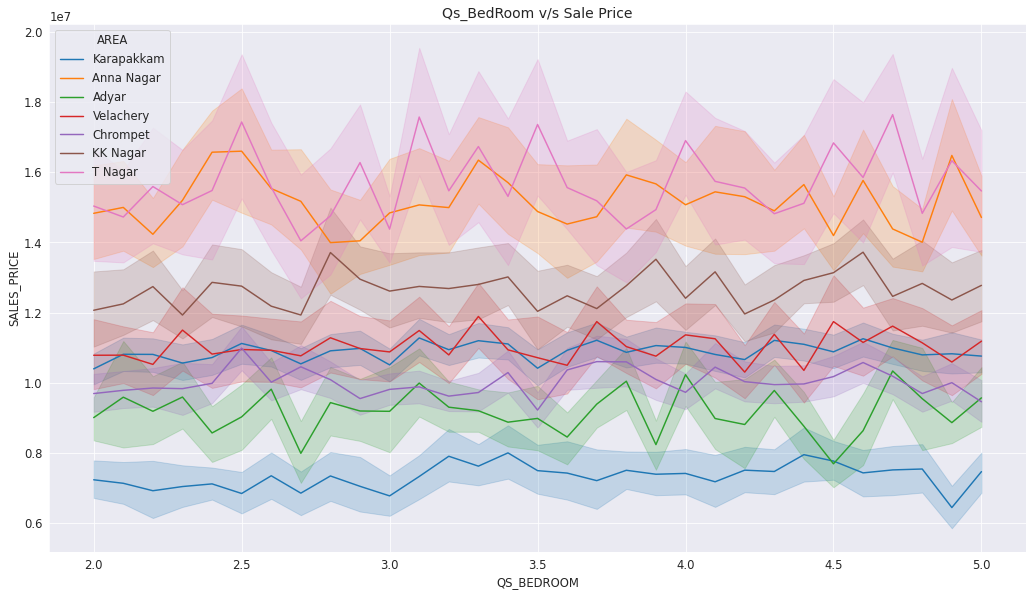

In [90]:
sns.lineplot(x='QS_BEDROOM',y='SALES_PRICE',data=df)
sns.lineplot(x='QS_BEDROOM',y='SALES_PRICE',hue="AREA",data=df)
plt.title('Qs_BedRoom v/s Sale Price')

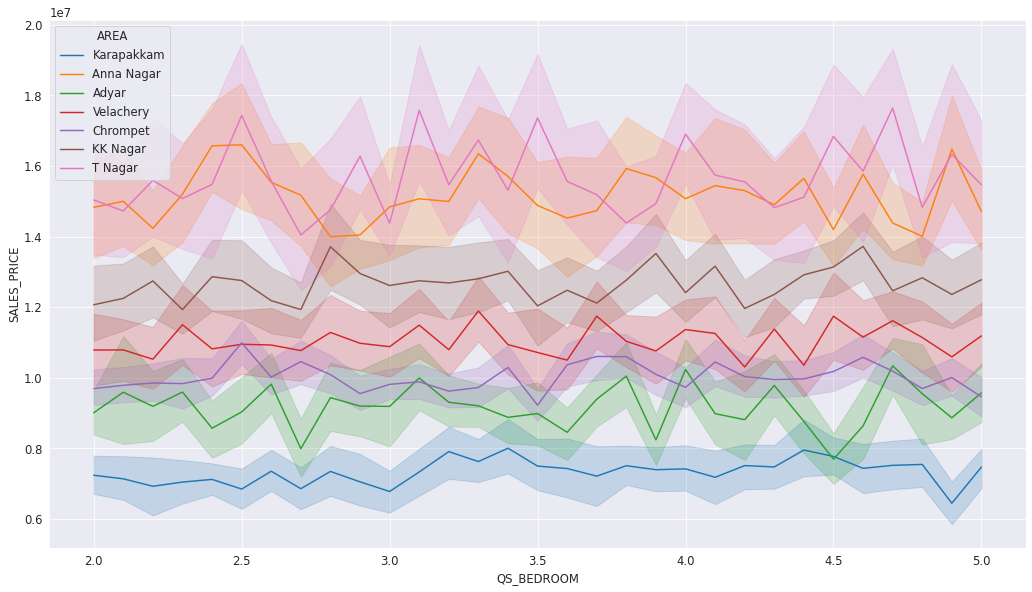

In [91]:
sns.lineplot(x='QS_BEDROOM',y='SALES_PRICE',hue="AREA",data=df)

# Qs_Overall v/s Sale Price

Text(0.5, 1.0, 'Qs_Overall v/s Sale Price')

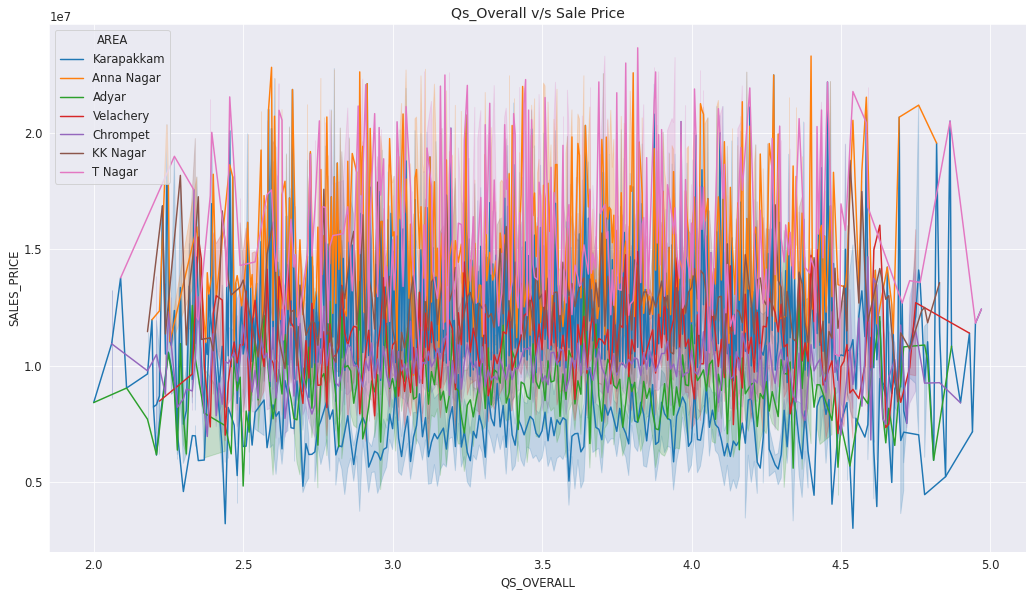

In [92]:
sns.lineplot(x='QS_OVERALL',y='SALES_PRICE',data=df)
sns.lineplot(x='QS_OVERALL',y='SALES_PRICE',hue='AREA',data=df)
plt.title('Qs_Overall v/s Sale Price')

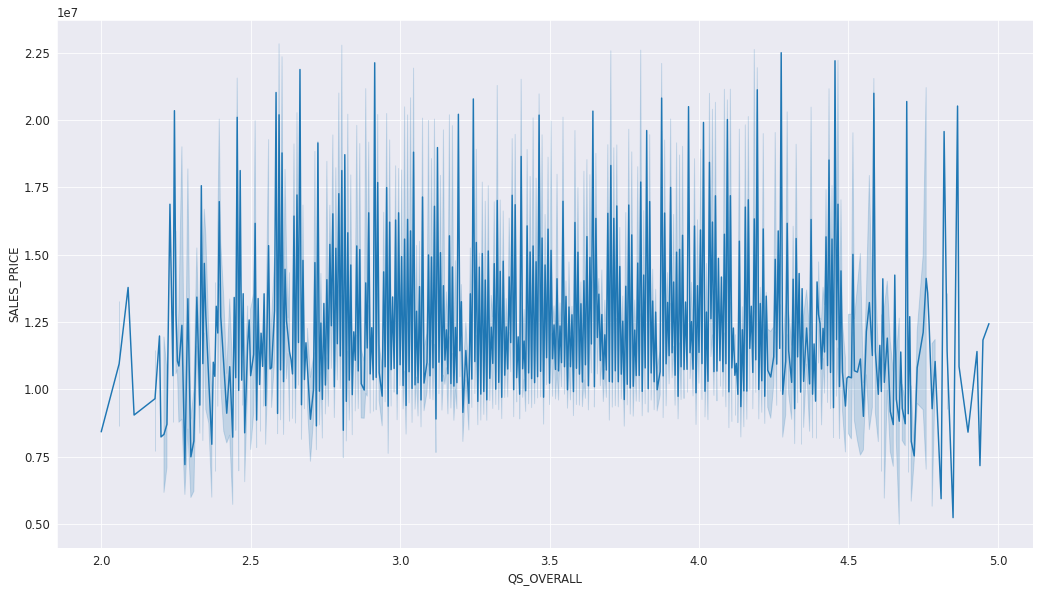

In [93]:
sns.lineplot(x='QS_OVERALL',y='SALES_PRICE',data=df)

# Build_Year v/s Sale Price

Text(0.5, 1.0, 'Build_Year v/s Sale Price')

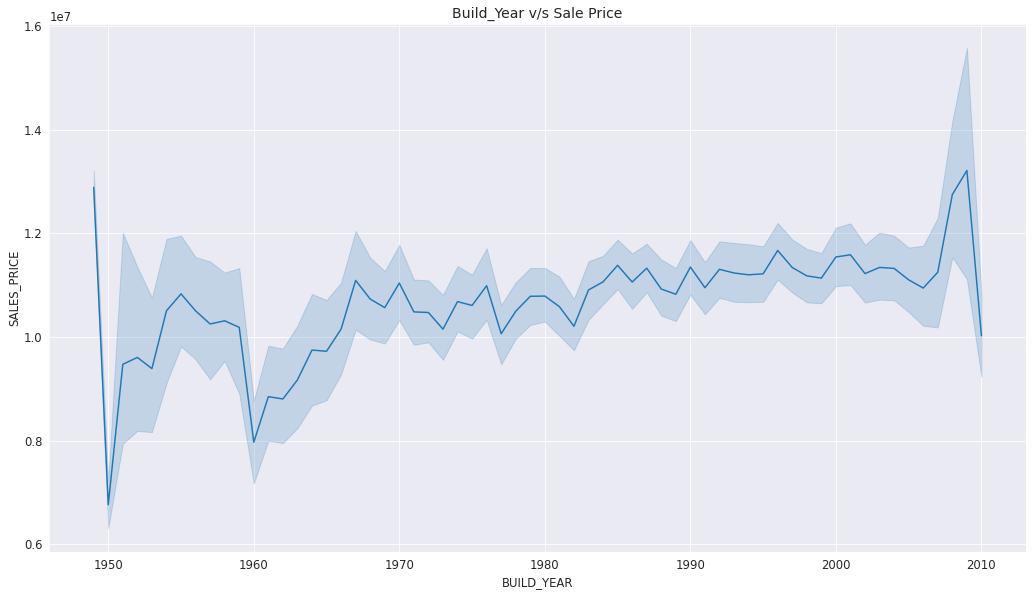

In [94]:
#sns.barplot(x='BUILD_YEAR',y='SALES_PRICE',hue="AREA",data=df)
sns.lineplot(x='BUILD_YEAR',y='SALES_PRICE',data=df)
plt.title('Build_Year v/s Sale Price')

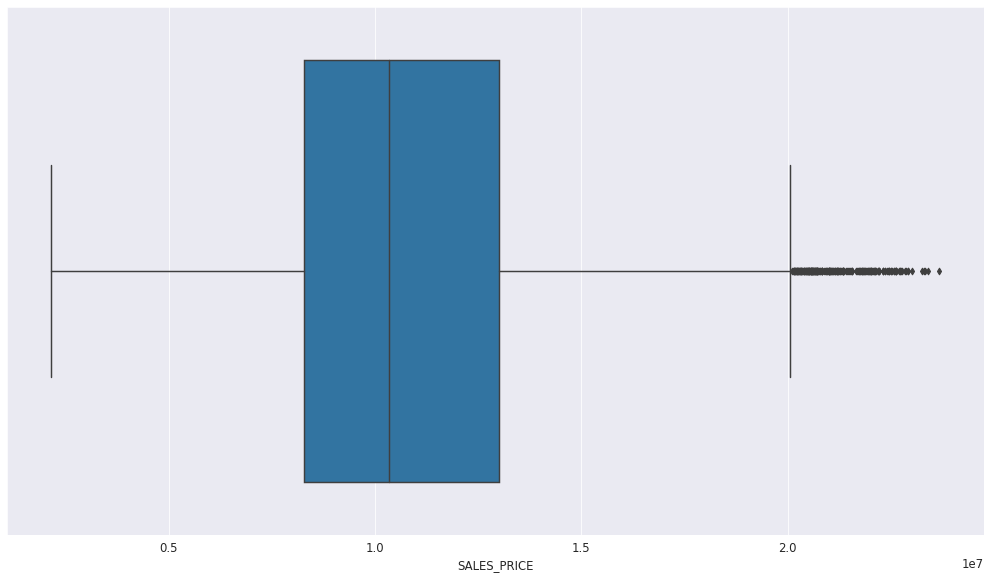

In [95]:
sns.boxplot(df.SALES_PRICE)

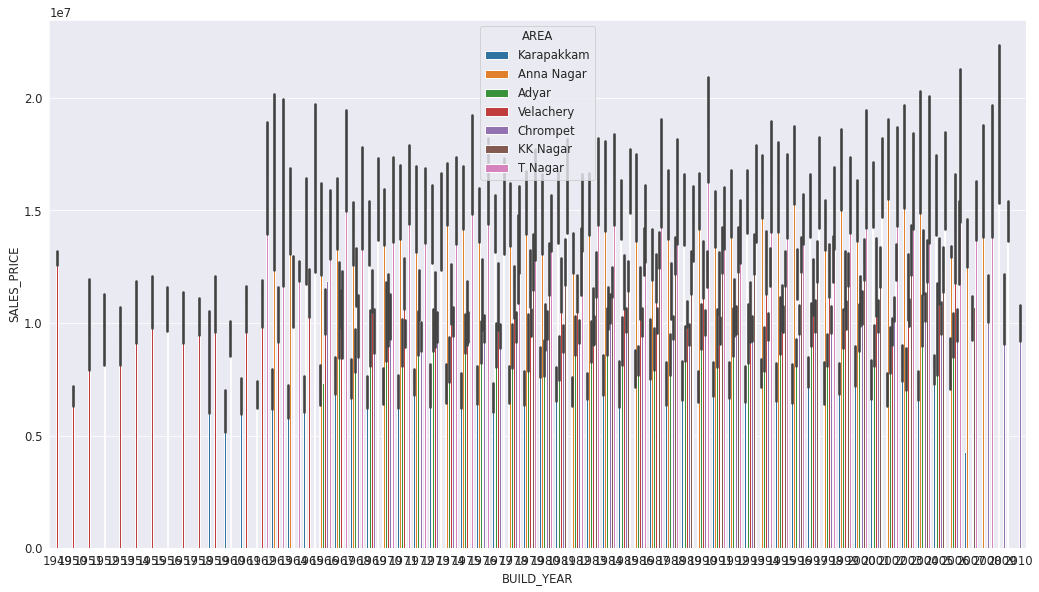

In [96]:
sns.barplot(x='BUILD_YEAR',y='SALES_PRICE',hue="AREA",data=df)

# SALES_PRICE

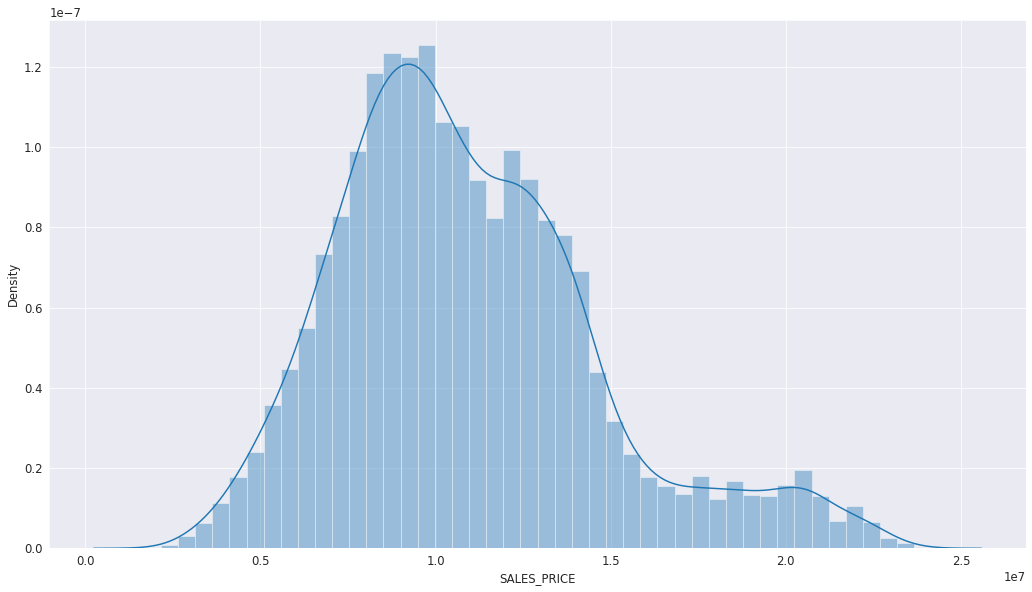

In [97]:
sns.distplot(df.SALES_PRICE)

# Pair Plot

In [174]:
plt.figure(figsize=(20,20))
sns.pairplot(df,x_vars=['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM','QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL'],
             y_vars=["SALES_PRICE"],palette='cool',kind="reg")
plt.show()

SyntaxError: ignored

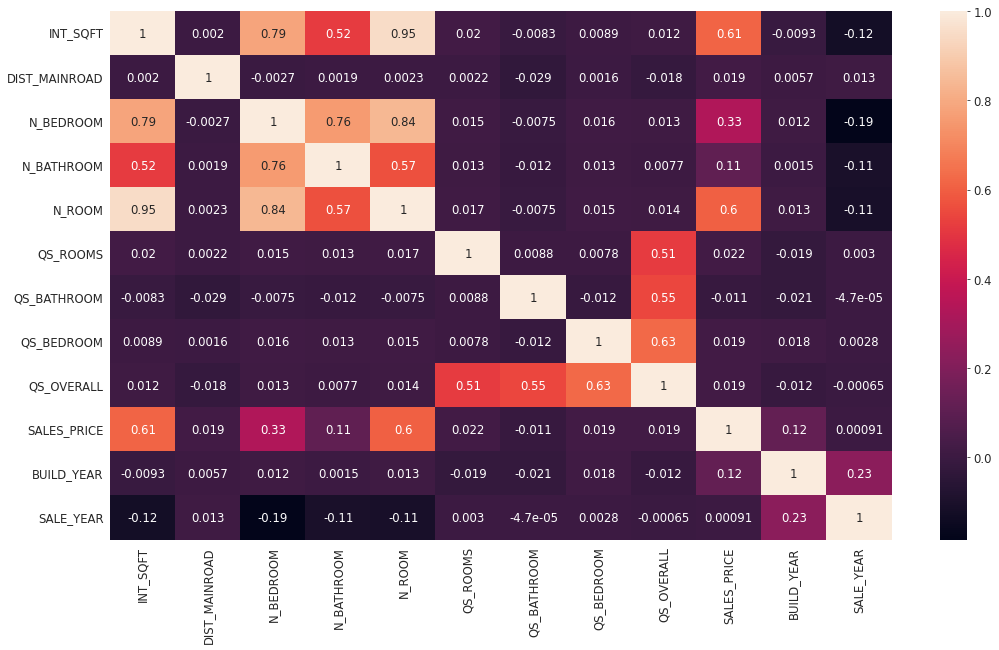

In [99]:
sns.heatmap(df.corr(),annot= True)

Best Sale in the Year

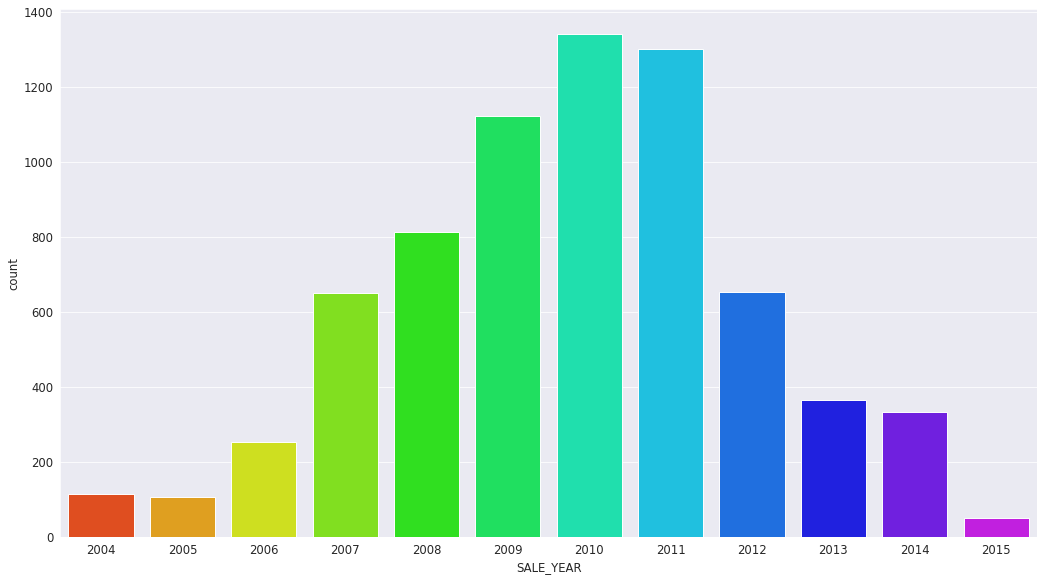

In [100]:
sns.countplot(data=df, x='SALE_YEAR', palette='gist_rainbow')

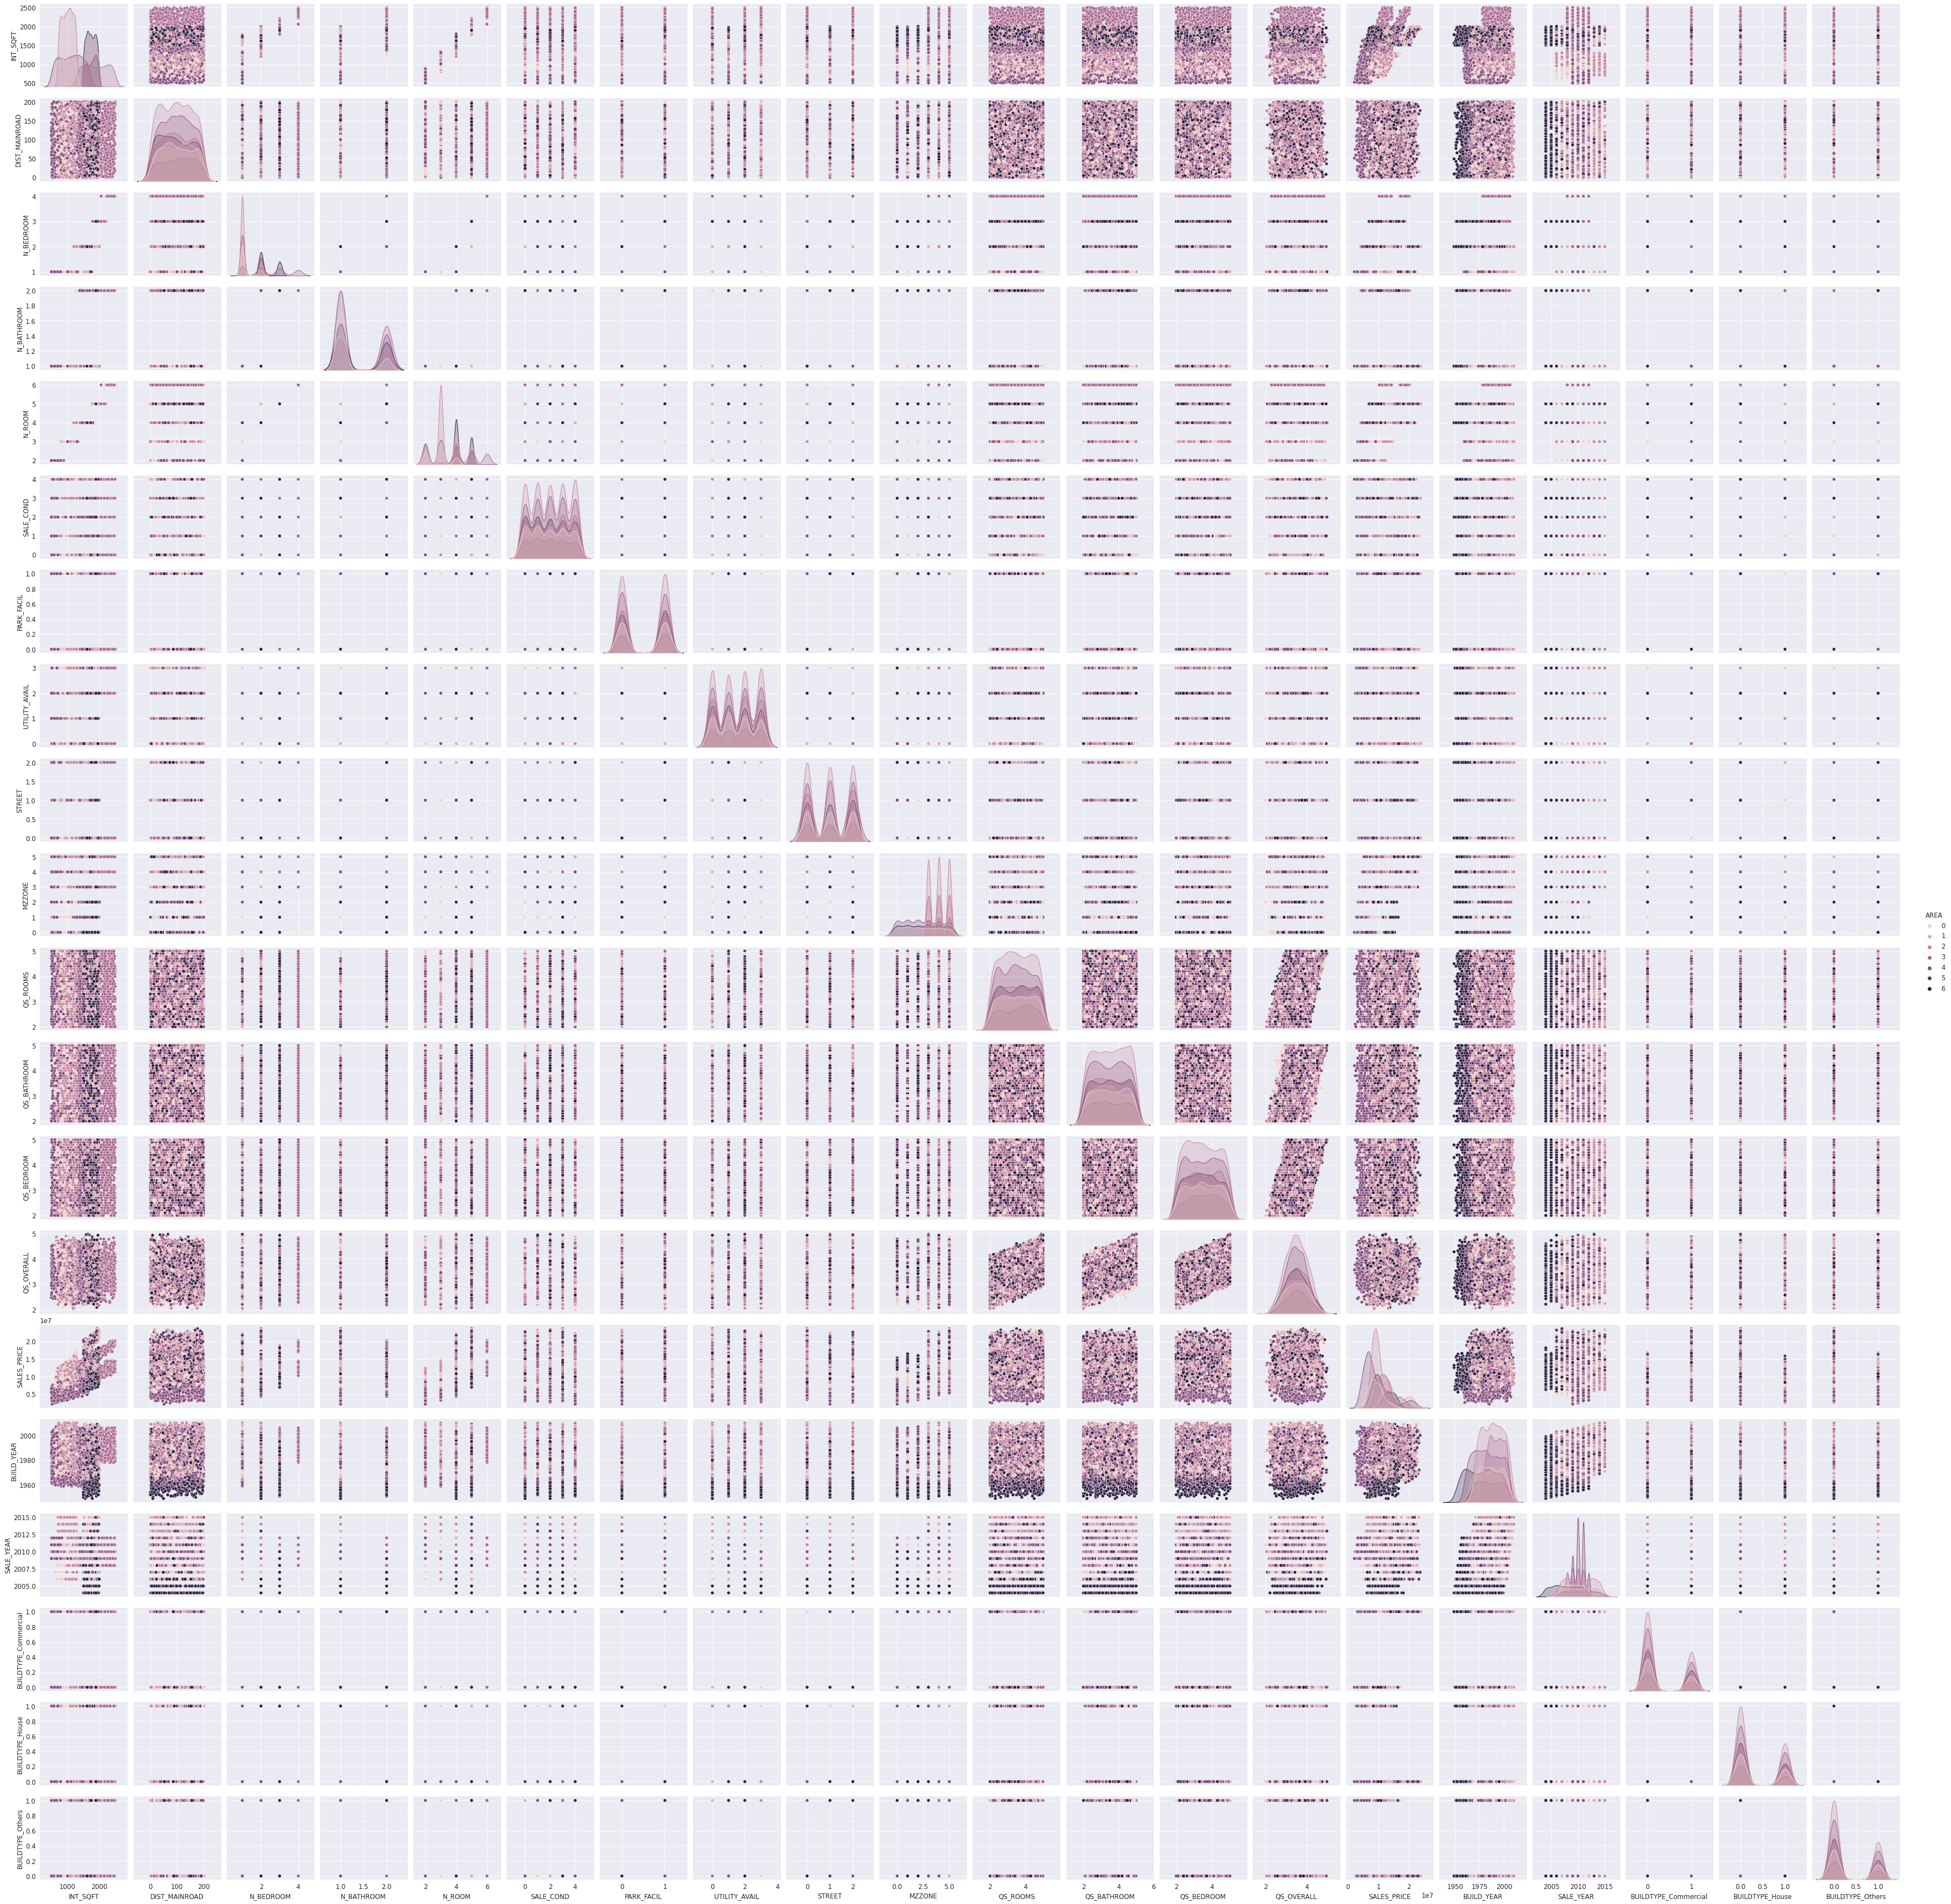

In [173]:
sns.pairplot(data=df, hue="AREA")


## *Encoding*

In [102]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['PARK_FACIL']=le.fit_transform(df['PARK_FACIL'])
df['AREA']=le.fit_transform(df['AREA'])
df['SALE_COND']=le.fit_transform(df['SALE_COND'])
df['UTILITY_AVAIL']=le.fit_transform(df['UTILITY_AVAIL'])
df['STREET']=le.fit_transform(df['STREET'])
df['MZZONE']=le.fit_transform(df['MZZONE'])


In [103]:
df = pd.get_dummies(df)

In [104]:
df.head()

AREA  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  SALE_COND  \
0     4      1004            131        1.0         1.0       3          0   
1     1      1986             26        2.0         1.0       5          0   
2     0       909             70        1.0         1.0       3          0   
3     6      1855             14        3.0         2.0       5          2   
4     4      1226             84        1.0         1.0       3          0   

   PARK_FACIL  UTILITY_AVAIL  STREET  MZZONE  QS_ROOMS  QS_BATHROOM  \
0           1              0       2       0       4.0          3.9   
1           0              0       0       3       4.9          4.2   
2           1              1       0       4       4.1          3.8   
3           0              3       2       2       4.7          3.9   
4           1              0       0       1       3.0          2.5   

   QS_BEDROOM  QS_OVERALL  SALES_PRICE  BUILD_YEAR  SALE_YEAR  \
0         4.9       4.330      7600000        1967       2011   
1         2.5       3.765     21717770        1995       2006   
2         2.2       3.090     13159200        1992       2012   
3         3.6       4.010      9630290        1988       2010   
4         4.1       3.290      7406250        1979       2009   

   BUILDTYPE_Commercial  BUILDTYPE_House  BUILDTYPE_Others  
0                     1                0                 0  
1                     1                0                 0  
2                     1                0                 0  
3                     0                0                 1  
4                     0                0                 1

In [105]:
df.shape

(7109, 21)

In [106]:
df.head()

AREA  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  SALE_COND  \
0     4      1004            131        1.0         1.0       3          0   
1     1      1986             26        2.0         1.0       5          0   
2     0       909             70        1.0         1.0       3          0   
3     6      1855             14        3.0         2.0       5          2   
4     4      1226             84        1.0         1.0       3          0   

   PARK_FACIL  UTILITY_AVAIL  STREET  MZZONE  QS_ROOMS  QS_BATHROOM  \
0           1              0       2       0       4.0          3.9   
1           0              0       0       3       4.9          4.2   
2           1              1       0       4       4.1          3.8   
3           0              3       2       2       4.7          3.9   
4           1              0       0       1       3.0          2.5   

   QS_BEDROOM  QS_OVERALL  SALES_PRICE  BUILD_YEAR  SALE_YEAR  \
0         4.9       4.330      7600000        1967       2011   
1         2.5       3.765     21717770        1995       2006   
2         2.2       3.090     13159200        1992       2012   
3         3.6       4.010      9630290        1988       2010   
4         4.1       3.290      7406250        1979       2009   

   BUILDTYPE_Commercial  BUILDTYPE_House  BUILDTYPE_Others  
0                     1                0                 0  
1                     1                0                 0  
2                     1                0                 0  
3                     0                0                 1  
4                     0                0                 1

In [107]:
df.isnull().sum()

AREA                    0
INT_SQFT                0
DIST_MAINROAD           0
N_BEDROOM               0
N_BATHROOM              0
N_ROOM                  0
SALE_COND               0
PARK_FACIL              0
UTILITY_AVAIL           0
STREET                  0
MZZONE                  0
QS_ROOMS                0
QS_BATHROOM             0
QS_BEDROOM              0
QS_OVERALL              0
SALES_PRICE             0
BUILD_YEAR              0
SALE_YEAR               0
BUILDTYPE_Commercial    0
BUILDTYPE_House         0
BUILDTYPE_Others        0
dtype: int64

In [108]:
df.to_csv("/content/train-chennai-sale.csv",index=False)

In [109]:
df=pd.read_csv("/content/train-chennai-sale.csv")

In [110]:
df.isnull().sum()

AREA                    0
INT_SQFT                0
DIST_MAINROAD           0
N_BEDROOM               0
N_BATHROOM              0
N_ROOM                  0
SALE_COND               0
PARK_FACIL              0
UTILITY_AVAIL           0
STREET                  0
MZZONE                  0
QS_ROOMS                0
QS_BATHROOM             0
QS_BEDROOM              0
QS_OVERALL              0
SALES_PRICE             0
BUILD_YEAR              0
SALE_YEAR               0
BUILDTYPE_Commercial    0
BUILDTYPE_House         0
BUILDTYPE_Others        0
dtype: int64

In [111]:
df.head()

AREA  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  SALE_COND  \
0     4      1004            131        1.0         1.0       3          0   
1     1      1986             26        2.0         1.0       5          0   
2     0       909             70        1.0         1.0       3          0   
3     6      1855             14        3.0         2.0       5          2   
4     4      1226             84        1.0         1.0       3          0   

   PARK_FACIL  UTILITY_AVAIL  STREET  MZZONE  QS_ROOMS  QS_BATHROOM  \
0           1              0       2       0       4.0          3.9   
1           0              0       0       3       4.9          4.2   
2           1              1       0       4       4.1          3.8   
3           0              3       2       2       4.7          3.9   
4           1              0       0       1       3.0          2.5   

   QS_BEDROOM  QS_OVERALL  SALES_PRICE  BUILD_YEAR  SALE_YEAR  \
0         4.9       4.330      7600000        1967       2011   
1         2.5       3.765     21717770        1995       2006   
2         2.2       3.090     13159200        1992       2012   
3         3.6       4.010      9630290        1988       2010   
4         4.1       3.290      7406250        1979       2009   

   BUILDTYPE_Commercial  BUILDTYPE_House  BUILDTYPE_Others  
0                     1                0                 0  
1                     1                0                 0  
2                     1                0                 0  
3                     0                0                 1  
4                     0                0                 1

In [112]:
df.shape

(7109, 21)

In [113]:
x=df.drop('SALES_PRICE',axis="columns")
x.head()

AREA  INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  SALE_COND  \
0     4      1004            131        1.0         1.0       3          0   
1     1      1986             26        2.0         1.0       5          0   
2     0       909             70        1.0         1.0       3          0   
3     6      1855             14        3.0         2.0       5          2   
4     4      1226             84        1.0         1.0       3          0   

   PARK_FACIL  UTILITY_AVAIL  STREET  MZZONE  QS_ROOMS  QS_BATHROOM  \
0           1              0       2       0       4.0          3.9   
1           0              0       0       3       4.9          4.2   
2           1              1       0       4       4.1          3.8   
3           0              3       2       2       4.7          3.9   
4           1              0       0       1       3.0          2.5   

   QS_BEDROOM  QS_OVERALL  BUILD_YEAR  SALE_YEAR  BUILDTYPE_Commercial  \
0         4.9       4.330        1967       2011                     1   
1         2.5       3.765        1995       2006                     1   
2         2.2       3.090        1992       2012                     1   
3         3.6       4.010        1988       2010                     0   
4         4.1       3.290        1979       2009                     0   

   BUILDTYPE_House  BUILDTYPE_Others  
0                0                 0  
1                0                 0  
2                0                 0  
3                0                 1  
4                0                 1

In [114]:
y=df['SALES_PRICE']
y.head()

0     7600000
1    21717770
2    13159200
3     9630290
4     7406250
Name: SALES_PRICE, dtype: int64

# Split Process 

In [115]:
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [116]:
X_train.shape,X_test.shape

((5687, 20), (1422, 20))

# **Scaling**

In [117]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(X_train) # find the values of mu and sigma
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

In [118]:
X_train

array([[-0.50959237, -1.09845163,  1.09983422, ...,  1.44710886,
        -0.72631368, -0.70412477],
       [-0.50959237, -1.27569053,  1.09983422, ..., -0.69103302,
         1.37681559, -0.70412477],
       [ 0.03690052,  1.31287266, -0.72819712, ..., -0.69103302,
         1.37681559, -0.70412477],
       ...,
       [ 1.12988631,  0.68925431,  1.11724404, ...,  1.44710886,
        -0.72631368, -0.70412477],
       [ 1.12988631,  0.93432538, -0.10144352, ..., -0.69103302,
        -0.72631368,  1.42020285],
       [ 0.03690052, -0.18599952, -0.04921405, ...,  1.44710886,
        -0.72631368, -0.70412477]])

# Simple Linear Regresion

In [119]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train)
regressor.score(X_test,y_test)

0.9040087535377669

In [120]:
print(regressor.intercept_)

10912499.272023913


In [121]:
print(regressor.coef_)

[ -522711.73999228  1859074.63324043     6088.73305398 -1161157.26479409
  -465446.87774555  1692972.97005872  -157030.97039      501521.66015788
   -75250.15863401  -207721.31977084   990794.90365037     9765.81396978
    -7247.16396944     2781.66977686    58515.05303002   209588.05920251
   -66465.50826457  1365746.15979149  -842956.64586434  -505469.08203723]


In [122]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([11635703.83506087,  2716714.7875199 , 10691158.40138834, ...,
       18203200.10351406, 12090769.05296047, 11476649.64286954])

In [123]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1.head()

Actual     Predicted
1419   9845950  1.163570e+07
1539   4703750  2.716715e+06
2133   8060000  1.069116e+07
7105  10818480  1.098124e+07
4167  12924800  1.363158e+07

In [124]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test,y_test)
lr_mae = metrics.mean_absolute_error(y_test,y_pred)
print("MSE: {:.2f}".format(metrics.mean_squared_error(y_test, y_pred)))
print("MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred)))

R2- SCORE: 0.9040087535377669
MSE: 1379112421164.99
MAE: 910342.32


# KNN Regressor

In [125]:
from sklearn.neighbors import KNeighborsRegressor


In [126]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)
knn_reg = knn_model.predict(X_test)

In [127]:
pds=pd.DataFrame({"Actual":y_test,"Predicted":knn_reg})
pds.head()

Actual   Predicted
1419   9845950  10991350.0
1539   4703750   6495380.0
2133   8060000   9415770.0
7105  10818480  11174262.0
4167  12924800  13039036.0

In [128]:
print("Knn model in Train:",knn_model.score(X_train, y_train))
print("Knn model in Test:",knn_model.score(X_test, y_test))

Knn model in Train: 0.9114013392768618
Knn model in Test: 0.8676485505719661


In [129]:
from sklearn.metrics import  r2_score
import numpy as np


In [142]:
knn_regressor = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
knn_ypred = knn_regressor.predict(X_test)
knn_score = metrics.r2_score(y_test, knn_ypred)

knn_mae = metrics.mean_absolute_error(y_test, knn_ypred)

print("KNN regressor train score: {:.2f}".format(knn_regressor.score(X_train, y_train)))
print("KNN regressor test score: {:.2f}".format(knn_regressor.score(X_test, y_test)))
print("KNN r2 score: {:.2f}".format(knn_score))

KNN regressor train score: 0.91
KNN regressor test score: 0.87
KNN r2 score: 0.87


# Decision Tree Regressor

In [148]:
from sklearn.tree import DecisionTreeRegressor

In [149]:
dt_regressor = DecisionTreeRegressor(max_depth=8).fit(X_train, y_train)

dt_y_predict = dt_regressor.predict(X_test)

In [150]:
t_score = metrics.r2_score(y_test, dt_y_predict)
dt_mae = metrics.mean_absolute_error(y_test, dt_y_predict)

print("DT Training score: {:.2f}".format(dt_regressor.score(X_train, y_train)))
print("DT Test score: {:.2f}".format(dt_regressor.score(X_test, y_test)))

print("")
print("DT R2 score: {:.2f}".format(metrics.r2_score(y_test, dt_y_predict)))
print("DT MSE: {:.2f}".format(metrics.mean_squared_error(y_test, dt_y_predict)))
print("DT MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, dt_y_predict)))

DT Training score: 0.97
DT Test score: 0.95

DT R2 score: 0.95
DT MSE: 687474944163.99
DT MAE: 648895.96


# RandomForestRegressor

In [134]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [151]:
rf_regressor = RandomForestRegressor(random_state=0).fit(X_train, y_train)

rf_y_predict = rf_regressor.predict(X_test)


# score
print("RF Training score: {:.2f}".format(rf_regressor.score(X_train, y_train)))
print("RF Test score: {:.2f}".format(rf_regressor.score(X_test, y_test)))


print("")
print("RF R2 score: {:.2f}".format(metrics.r2_score(y_test, rf_y_predict)))
print("RF MSE: {:.2f}".format(metrics.mean_squared_error(y_test, rf_y_predict)))
print("RF MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, rf_y_predict)))

RF Training score: 1.00
RF Test score: 0.98

RF R2 score: 0.98
RF MSE: 299190910299.83
RF MAE: 422317.09


# Cross validation of random forest regressor

In [155]:
# initiating the model with best estimators
rf_regressor = RandomForestRegressor(max_depth=9, n_estimators=100, random_state=0)
# fit the model with training data
rf_regressor.fit(X_train, y_train)
# predict on X_test
rf_y_predict = rf_regressor.predict(X_test)


rf_score = metrics.r2_score(y_test, rf_y_predict)
rf_mae = metrics.mean_absolute_error(y_test, rf_y_predict)

print("RF Training score: {:.2f}".format(rf_regressor.score(X_train, y_train)))
print("RF Test score: {:.2f}".format(rf_regressor.score(X_test, y_test)))


print("")
print("RF R2 score: {:.2f}".format(metrics.r2_score(y_test, rf_y_predict)))
print("RF MSE: {:.2f}".format(metrics.mean_squared_error(y_test, rf_y_predict)))
print("RF MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, rf_y_predict)))

RF Training score: 0.99
RF Test score: 0.97

RF R2 score: 0.97
RF MSE: 375476163351.29
RF MAE: 481643.21


# Model Comparison 

In [168]:
model_comp=pd.DataFrame({ "model":"Linear KNN  Decision RandomForerst ".split(),
                         "r2":[regressor.score(X_test,y_test),knn_score,rsquared,r2_score(predictions,y_pred)],
                         "mae": [lr_mae, knn_mae, dt_mae, rf_mae ]})
   

In [169]:
model_comp

model        r2           mae
0         Linear  0.904009  9.103423e+05
1            KNN  0.867649  1.021535e+06
2       Decision  0.955158  6.488960e+05
3  RandomForerst  0.872579  4.816432e+05

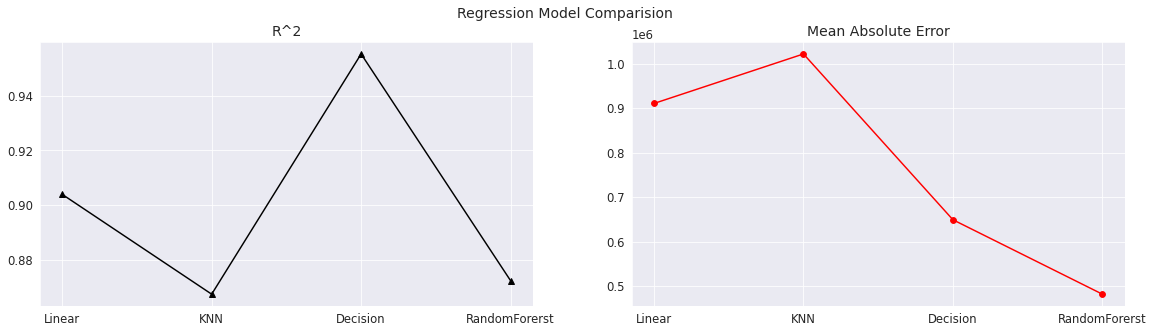

In [172]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Regression Model Comparision")
ax[0].plot(model_comp.model, model_comp.r2, color='black', marker='^')
ax[0].set_title("R^2")
ax[1].plot(model_comp.model, model_comp.mae, color='r', marker='o')
ax[1].set_title("Mean Absolute Error")
plt.show()

By Using the ML Algorithms we found our best model in Regressor.